In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc t

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_tvshows = pd.read_csv(path + 'otttvshows.csv')
 
df_tvshows.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18+   6.9             94%       NaN   
1   2         Philadelphia  1993  13+   8.8             80%       NaN   
2   3                 Roma  2018  18+   8.7             93%       NaN   
3   4                  Amy  2015  18+   7.0             87%       NaN   
4   5  The Young Offenders  2016  NaN   8.0            100%       NaN   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country Language  \
0      Action,Drama,Sci-Fi,Thriller                 United States  English   
1                            Comedy                 United States  English   
2  Action,Drama,History,Romance,War  United Kingdom,United States  English   
3                             Drama                 United States  English   
4                            Comedy        United Kingdom,Ireland  English   

                                            Plotline  Runtime       Kind  \
0  Set seven years after the world has become a f...     60.0  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...     22.0  tv series   
2  In this British historical drama, the turbulen...     52.0  tv series   
3  A family drama focused on three generations of...     60.0  tv series   
4                                                NaN     30.0  tv series   

   Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0      3.0        1     0            0        0     1  
1     18.0        1     0            0        0     1  
2      2.0        1     0            0        0     1  
3      6.0        1     0            1        1     1  
4      3.0        1     0            0        0     1

In [6]:
# profile = ProfileReport(df_tvshows)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  5432
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
**************

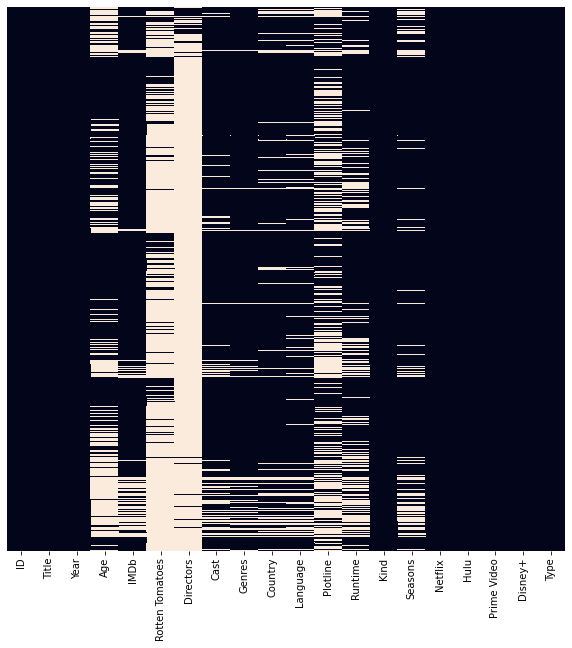

In [8]:
data_investigate(df_tvshows)

In [9]:
# ID
# df_tvshows = df_tvshows.drop(['ID'], axis = 1)
 
# Age
df_tvshows.loc[df_tvshows['Age'].isnull() & df_tvshows['Disney+'] == 1, "Age"] = '13'
# df_tvshows.fillna({'Age' : 18}, inplace = True)
df_tvshows.fillna({'Age' : 'NR'}, inplace = True)
df_tvshows['Age'].replace({'all': '0'}, inplace = True)
df_tvshows['Age'].replace({'7+': '7'}, inplace = True)
df_tvshows['Age'].replace({'13+': '13'}, inplace = True)
df_tvshows['Age'].replace({'16+': '16'}, inplace = True)
df_tvshows['Age'].replace({'18+': '18'}, inplace = True)
# df_tvshows['Age'] = df_tvshows['Age'].astype(int)
 
# IMDb
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].mean()}, inplace = True)
# df_tvshows.fillna({'IMDb' : df_tvshows['IMDb'].median()}, inplace = True)
df_tvshows.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'][df_tvshows['Rotten Tomatoes'].notnull()].astype(int)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].mean()}, inplace = True)
# df_tvshows.fillna({'Rotten Tomatoes' : df_tvshows['Rotten Tomatoes'].median()}, inplace = True)
# df_tvshows['Rotten Tomatoes'] = df_tvshows['Rotten Tomatoes'].astype(int)
df_tvshows.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_tvshows = df_tvshows.drop(['Directors'], axis = 1)
df_tvshows.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_tvshows.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_tvshows.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_tvshows.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_tvshows.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_tvshows.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_tvshows.fillna({'Runtime' : df_tvshows['Runtime'].mean()}, inplace = True)
# df_tvshows['Runtime'] = df_tvshows['Runtime'].astype(int)
df_tvshows.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_tvshows.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_tvshows.fillna({'Type': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Type'], axis = 1)
 
# Seasons
# df_tvshows.fillna({'Seasons': 1}, inplace = True)
df_tvshows.fillna({'Seasons': "NA"}, inplace = True)
# df_tvshows = df_tvshows.drop(['Seasons'], axis = 1)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
# df_tvshows.fillna({'Seasons' : df_tvshows['Seasons'].mean()}, inplace = True)
# df_tvshows['Seasons'] = df_tvshows['Seasons'].astype(int)
 
# Service Provider
df_tvshows['Service Provider'] = df_tvshows.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_tvshows.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_tvshows.dropna(how = 'any', inplace = True)
df_tvshows.drop_duplicates(inplace = True)

No of Rows :  5432
No of Coloums :  21
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Seasons             object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
S

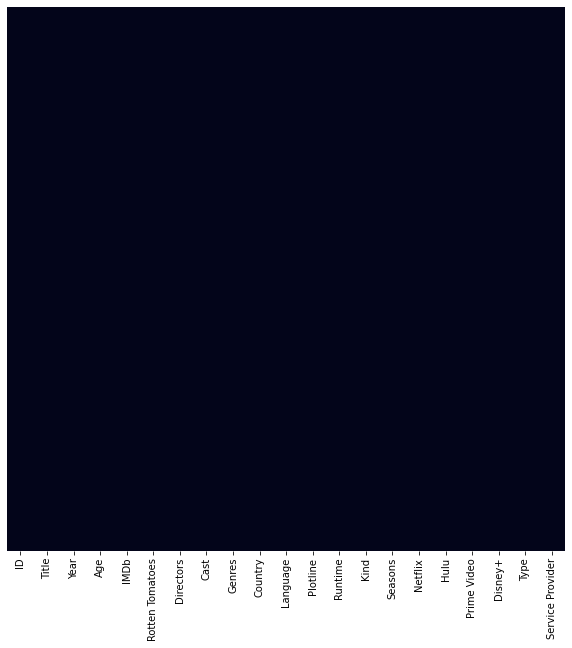

In [10]:
data_investigate(df_tvshows)

In [11]:
df_tvshows.head()

ID                Title  Year Age IMDb Rotten Tomatoes Directors  \
0   1          Snowpiercer  2013  18  6.9              94        NA   
1   2         Philadelphia  1993  13  8.8              80        NA   
2   3                 Roma  2018  18  8.7              93        NA   
3   4                  Amy  2015  18    7              87        NA   
4   5  The Young Offenders  2016  NR    8             100        NA   

                                                Cast  \
0  Daveed Diggs,Iddo Goldberg,Mickey Sumner,Aliso...   
1  Charlie Day,Glenn Howerton,Rob McElhenney,Kait...   
2  Kevin McKidd,Ray Stevenson,Polly Walker,Kerry ...   
3  Amy Brenneman,Richard T. Jones,Jessica Tuck,Ma...   
4  Alex Murphy,Chris Walley,Hilary Rose,Dominic M...   

                             Genres                       Country  ...  \
0      Action,Drama,Sci-Fi,Thriller                 United States  ...   
1                            Comedy                 United States  ...   
2  Action,Drama,History,Romance,War  United Kingdom,United States  ...   
3                             Drama                 United States  ...   
4                            Comedy        United Kingdom,Ireland  ...   

                                            Plotline Runtime       Kind  \
0  Set seven years after the world has become a f...      60  tv series   
1  The gang, 5 raging alcoholic, narcissists run ...      22  tv series   
2  In this British historical drama, the turbulen...      52  tv series   
3  A family drama focused on three generations of...      60  tv series   
4                                                 NA      30  tv series   

  Seasons Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  
0       3       1     0            0        0     1           Netflix  
1      18       1     0            0        0     1           Netflix  
2       2       1     0            0        0     1           Netflix  
3       6       1     0            1        1     1           Netflix  
4       3       1     0            0        0     1           Netflix  

[5 rows x 21 columns]

In [12]:
df_tvshows.describe()

ID         Year      Netflix         Hulu  Prime Video  \
count  5432.000000  5432.000000  5432.000000  5432.000000  5432.000000   
mean   2716.500000  2010.668446     0.341311     0.293999     0.403351   
std    1568.227662    11.726176     0.474193     0.455633     0.490615   
min       1.000000  1901.000000     0.000000     0.000000     0.000000   
25%    1358.750000  2009.000000     0.000000     0.000000     0.000000   
50%    2716.500000  2014.000000     0.000000     0.000000     0.000000   
75%    4074.250000  2017.000000     1.000000     1.000000     1.000000   
max    5432.000000  2020.000000     1.000000     1.000000     1.000000   

           Disney+    Type  
count  5432.000000  5432.0  
mean      0.033689     1.0  
std       0.180445     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       1.000000     1.0

In [13]:
df_tvshows.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.031346 -0.646330  0.034293     0.441264  0.195409   
Year        -0.031346  1.000000  0.222316 -0.065807    -0.198675 -0.022741   
Netflix     -0.646330  0.222316  1.000000 -0.366515    -0.515086 -0.119344   
Hulu         0.034293 -0.065807 -0.366515  1.000000    -0.377374 -0.075701   
Prime Video  0.441264 -0.198675 -0.515086 -0.377374     1.000000 -0.151442   
Disney+      0.195409 -0.022741 -0.119344 -0.075701    -0.151442  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_tvshows.sort_values('Year', ascending = True)
# df_tvshows.sort_values('IMDb', ascending = False)

In [15]:
# df_tvshows.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_otttvshows.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_tvshows = pd.read_csv(path + 'updated_otttvshows.csv')
 
# udf_tvshows

In [16]:
# df_netflix_tvshows = df_tvshows.loc[(df_tvshows['Netflix'] > 0)]
# df_hulu_tvshows = df_tvshows.loc[(df_tvshows['Hulu'] > 0)]
# df_prime_video_tvshows = df_tvshows.loc[(df_tvshows['Prime Video'] > 0)]
# df_disney_tvshows = df_tvshows.loc[(df_tvshows['Disney+'] > 0)]

In [17]:
df_netflix_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 1) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_hulu_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 1) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 0)]
df_prime_video_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 1 ) & (df_tvshows['Disney+'] == 0)]
df_disney_only_tvshows = df_tvshows[(df_tvshows['Netflix'] == 0) & (df_tvshows['Hulu'] == 0) & (df_tvshows['Prime Video'] == 0 ) & (df_tvshows['Disney+'] == 1)]

In [18]:
df_tvshows_directors = df_tvshows.copy()

In [19]:
df_tvshows_directors.drop(df_tvshows_directors.loc[df_tvshows_directors['Directors'] == "NA"].index, inplace = True)
# df_tvshows_directors = df_tvshows_directors[df_tvshows_directors.Director != "NA"]
# df_tvshows_directors['Director'] = df_tvshows_directors['Director'].astype(str)

In [20]:
df_tvshows_count_directors = df_tvshows_directors.copy()

In [21]:
df_tvshows_director = df_tvshows_directors.copy()

In [22]:
# Create directors dict where key=name and value = number of directors
 
directors = {}
 
for i in df_tvshows_count_directors['Directors'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        directors[i] = len(i.split(','))
    else:
        directors[i] = 0
    
# Add this information to our dataframe as a new column
 
df_tvshows_count_directors['Number of Directors'] = df_tvshows_count_directors['Directors'].map(directors).astype(int)

In [23]:
df_tvshows_mixed_directors = df_tvshows_count_directors.copy()

In [24]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_directors_tvshows = df_tvshows_count_directors.loc[df_tvshows_count_directors['Netflix'] == 1]
hulu_directors_tvshows = df_tvshows_count_directors.loc[df_tvshows_count_directors['Hulu'] == 1]
prime_video_directors_tvshows = df_tvshows_count_directors.loc[df_tvshows_count_directors['Prime Video'] == 1]
disney_directors_tvshows = df_tvshows_count_directors.loc[df_tvshows_count_directors['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

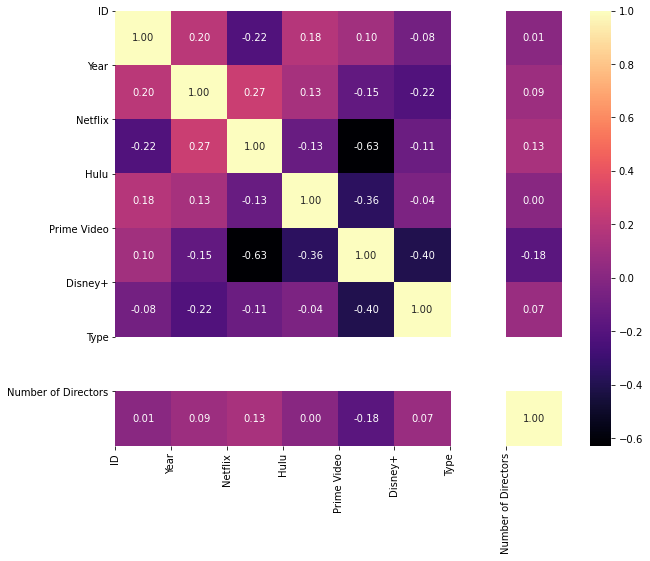

In [25]:
plt.figure(figsize = (10, 10))
corr = df_tvshows_count_directors.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_directors_most_tvshows = df_tvshows_count_directors.sort_values(by = 'Number of Directors', ascending = False).reset_index()
df_directors_most_tvshows = df_directors_most_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_directors['Number of Directors'] == (df_tvshows_count_directors['Number of Directors'].max()))
# df_directors_most_tvshows = df_tvshows_count_directors[filter]
 
# mostest_rated_tvshows = df_tvshows_count_directors.loc[df_tvshows_count_directors['Number of Directors'].idxmax()]
 
print('\nTV Shows with Highest Ever Number of Directors are : \n')
df_directors_most_tvshows.head(5)


TV Shows with Highest Ever Number of Directors are : 



ID                                       Title  Year Age IMDb  \
0    54             Stretch Armstrong: The Breakout  2018  NR  6.6   
1  3618                               Andy Explores  2019  NR   NA   
2  1560  Trailer Park Boys: Out of the Park: Europe  2016  18  7.8   
3    26                                       K. D.  2019  NR  8.6   
4   492              Ice Age: The Great Egg-Scapade  2016   7  5.9   

  Rotten Tomatoes                                          Directors  \
0              NA  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...   
1              NA  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...   
2              NA  Gary Howsam,Mike Smith,John Paul Tremblay,Robb...   
3              87  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...   
4              NA  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...   

                                                Cast  \
0  Ogie Banks,Clancy Brown,Yvette Nicole Brown,Ga...   
1  Ronnie Das,Jordan Sanchez,James Stone,Theresa ...   
2  John Paul Tremblay,Robb Wells,Mike Smith,Tom M...   
3  Maya Alagh,Nayan Bhatt,Manav Gohil,Darshan Jar...   
4  Blake Anderson,Tyree Brown,David Cowgill,Jenni...   

                                           Genres        Country  ... Runtime  \
0  Animation,Short,Action,Adventure,Comedy,Sci-Fi             NA  ...      NA   
1              Documentary,Family,News,Reality-TV             NA  ...      NA   
2                    Adventure,Comedy,Crime,Drama             NA  ...      NA   
3                    Crime,Drama,Mystery,Thriller             NA  ...      45   
4         Animation,Short,Adventure,Comedy,Family  United States  ...      25   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series      NA       1    0            0        0     1   
1  tv series      NA       0    1            0        0     1   
2  tv series      NA       1    0            0        0     1   
3  tv series      NA       1    0            0        0     1   
4  tv series      NA       0    0            0        1     1   

   Service Provider  Number of Directors  
0           Netflix                    5  
1              Hulu                    4  
2           Netflix                    4  
3           Netflix                    4  
4           Disney+                    4  

[5 rows x 22 columns]

In [27]:
fig = px.bar(y = df_directors_most_tvshows['Title'][:15],
             x = df_directors_most_tvshows['Number of Directors'][:15], 
             color = df_directors_most_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Highest Number of Directors : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_directors_least_tvshows = df_tvshows_count_directors.sort_values(by = 'Number of Directors', ascending = True).reset_index()
df_directors_least_tvshows = df_directors_least_tvshows.drop(['index'], axis = 1)
# filter = (df_tvshows_count_directors['Number of Directors'] == (df_tvshows_count_directors['Number of Directors'].min()))
# df_directors_least_tvshows = df_tvshows_count_directors[filter]

print('\nTV Shows with Lowest Ever Number of Directors are : \n')
df_directors_least_tvshows.head(5)


TV Shows with Lowest Ever Number of Directors are : 



ID                         Title  Year Age IMDb Rotten Tomatoes  \
0    7                  A Wednesday!  2008  NR  8.1              NA   
1  411                     Checkmate  2015  NR  7.6              NA   
2  413  Demented Death Farm Massacre  1971  18  8.3              NA   
3  424           Renfield the Undead  2011  NR  2.8              NA   
4  427            Universal Soldiers  2007  NR  6.1              56   

              Directors                                               Cast  \
0         Neeraj Pandey                                                 NA   
1  Timothy Woodward Jr.  Anthony George,Doug McClure,Sebastian Cabot,Ke...   
2            Brad Jones                                         Brad Jones   
3           Bob Willems  Cory Hart,Julin,Denise Williamson,Natalie Popo...   
4         Tetsurô Amino  Yasunori Matsumoto,Akira Kamiya,Hirotaka Suzuo...   

                                        Genres        Country  ... Runtime  \
0                 Comedy,Family,Fantasy,Horror  United States  ...     104   
1                          Crime,Drama,Mystery  United States  ...      60   
2                                       Comedy             NA  ...      11   
3  Comedy,Drama,Horror,Mystery,Sci-Fi,Thriller             NA  ...     111   
4                Animation,Action,Drama,Sci-Fi          Japan  ...     150   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series       1       1    0            0        0     1   
1  tv series       2       0    0            1        0     1   
2  tv series      NA       0    0            1        0     1   
3  tv series      NA       0    0            1        0     1   
4  tv series       1       0    0            1        0     1   

   Service Provider  Number of Directors  
0           Netflix                    1  
1       Prime Video                    1  
2       Prime Video                    1  
3       Prime Video                    1  
4       Prime Video                    1  

[5 rows x 22 columns]

In [29]:
fig = px.bar(y = df_directors_least_tvshows['Title'][:15],
             x = df_directors_least_tvshows['Number of Directors'][:15], 
             color = df_directors_least_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Lowest Number of Directors : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_tvshows_count_directors['Number of Directors'].unique().shape[0]}' unique Number of Directors s were Given, They were Like this,\n
      
      {df_tvshows_count_directors.sort_values(by = 'Number of Directors', ascending = False)['Number of Directors'].unique()}\n
 
      The Highest Number of Directors Ever Any TV Show Got is '{df_directors_most_tvshows['Title'][0]}' : '{df_directors_most_tvshows['Number of Directors'].max()}'\n
 
      The Lowest Number of Directors Ever Any TV Show Got is '{df_directors_least_tvshows['Title'][0]}' : '{df_directors_least_tvshows['Number of Directors'].min()}'\n
      ''')


      Total '5' unique Number of Directors s were Given, They were Like this,

      
      [5 4 3 2 1]

 
      The Highest Number of Directors Ever Any TV Show Got is 'Stretch Armstrong: The Breakout' : '5'

 
      The Lowest Number of Directors Ever Any TV Show Got is 'A Wednesday!' : '1'

      


In [31]:
netflix_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Netflix']==1].reset_index()
netflix_directors_most_tvshows = netflix_directors_most_tvshows.drop(['index'], axis = 1)
 
netflix_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Netflix']==1].reset_index()
netflix_directors_least_tvshows = netflix_directors_least_tvshows.drop(['index'], axis = 1)
 
netflix_directors_most_tvshows.head(5)

ID                                       Title  Year Age IMDb  \
0    54             Stretch Armstrong: The Breakout  2018  NR  6.6   
1  1560  Trailer Park Boys: Out of the Park: Europe  2016  18  7.8   
2    26                                       K. D.  2019  NR  8.6   
3    78       Elles étaient en guerre (1914 - 1918)  2014  NR  7.9   
4    65                             All About Asado  2016  NR  6.6   

  Rotten Tomatoes                                          Directors  \
0              NA  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...   
1              NA  Gary Howsam,Mike Smith,John Paul Tremblay,Robb...   
2              87  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...   
3              NA                         Fabien Beziat,Hugues Nancy   
4              NA                          Tony Bueno,Emily Pattison   

                                                Cast  \
0  Ogie Banks,Clancy Brown,Yvette Nicole Brown,Ga...   
1  John Paul Tremblay,Robb Wells,Mike Smith,Tom M...   
2  Maya Alagh,Nayan Bhatt,Manav Gohil,Darshan Jar...   
3  Nathalie Baye,Edith Wharton,Louise Bodin,Emmel...   
4                                      Abby Harrison   

                                           Genres        Country  ... Runtime  \
0  Animation,Short,Action,Adventure,Comedy,Sci-Fi             NA  ...      NA   
1                    Adventure,Comedy,Crime,Drama             NA  ...      NA   
2                    Crime,Drama,Mystery,Thriller             NA  ...      45   
3                             Documentary,History         France  ...      95   
4                                       Talk-Show  United States  ...      89   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series      NA       1    0            0        0     1   
1  tv series      NA       1    0            0        0     1   
2  tv series      NA       1    0            0        0     1   
3  tv series      NA       1    0            0        0     1   
4  tv series      NA       1    0            0        0     1   

   Service Provider  Number of Directors  
0           Netflix                    5  
1           Netflix                    4  
2           Netflix                    4  
3           Netflix                    2  
4           Netflix                    2  

[5 rows x 22 columns]

In [32]:
fig = px.bar(y = netflix_directors_most_tvshows['Title'][:15],
             x = netflix_directors_most_tvshows['Number of Directors'][:15], 
             color = netflix_directors_most_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Highest Number of Directors : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_directors_least_tvshows['Title'][:15],
             x = netflix_directors_least_tvshows['Number of Directors'][:15], 
             color = netflix_directors_least_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Lowest Number of Directors : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Hulu']==1].reset_index()
hulu_directors_most_tvshows = hulu_directors_most_tvshows.drop(['index'], axis = 1)
 
hulu_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Hulu']==1].reset_index()
hulu_directors_least_tvshows = hulu_directors_least_tvshows.drop(['index'], axis = 1)
 
hulu_directors_most_tvshows.head(5)

ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  3618                 Andy Explores  2019  NR   NA              NA   
1  3685       Lost in the Supermarket  2016  NR  7.5              NA   
2  2328  Food Wars! Shokugeki no Soma  2015  18  8.3              NA   
3  3005                 Elena's Ghost  2015  16  7.6              NA   
4  3171                      Too Cute  2011   7  8.5              NA   

                                           Directors  \
0  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...   
1                        Nelson Boles,Raymie Muzquiz   
2                                  Zenith DeGregorio   
3                                       Fidel Lorite   
4                                   Brian K. Roberts   

                                                Cast  \
0  Ronnie Das,Jordan Sanchez,James Stone,Theresa ...   
1  Eva Bella,Katie Crown,Emily Eiden,Sean Giambro...   
2                                  Zenith DeGregorio   
3  Tormenta García,Jorge Hernández,Margott,Chema ...   
4  Sydney Imbeau,Kiana Madeira,Neil Crone,Wesley ...   

                                    Genres Country  ... Runtime       Kind  \
0       Documentary,Family,News,Reality-TV      NA  ...      NA  tv series   
1  Animation,Short,Adventure,Comedy,Family      NA  ...      11  tv series   
2                              Documentary      NA  ...      NA  tv series   
3                                   Comedy      NA  ...      NA  tv series   
4                            Comedy,Family      NA  ...      22  tv series   

  Seasons Netflix Hulu  Prime Video  Disney+  Type  Service Provider  \
0      NA       0    1            0        0     1              Hulu   
1      NA       0    1            0        0     1              Hulu   
2      NA       0    1            0        0     1              Hulu   
3      NA       0    1            0        0     1              Hulu   
4      NA       0    1            0        0     1              Hulu   

   Number of Directors  
0                    4  
1                    2  
2                    1  
3                    1  
4                    1  

[5 rows x 22 columns]

In [35]:
fig = px.bar(y = hulu_directors_most_tvshows['Title'][:15],
             x = hulu_directors_most_tvshows['Number of Directors'][:15], 
             color = hulu_directors_most_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Highest Number of Directors : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_directors_least_tvshows['Title'][:15],
             x = hulu_directors_least_tvshows['Number of Directors'][:15], 
             color = hulu_directors_least_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Lowest Number of Directors : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Prime Video']==1].reset_index()
prime_video_directors_most_tvshows = prime_video_directors_most_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Prime Video']==1].reset_index()
prime_video_directors_least_tvshows = prime_video_directors_least_tvshows.drop(['index'], axis = 1)
 
prime_video_directors_most_tvshows.head(5)

ID                      Title  Year Age IMDb Rotten Tomatoes  \
0  4231  Kokkoku, Moment by Moment  2018  18  8.1              NA   
1   247               Cruel Summer  2016  NR  8.2              NA   
2   402              Guns And Guts  1974  NR  5.2              NA   
3   165                        Zog  2019  NR  7.4              NA   
4   150    The Day of the Triffids  1962  NR  5.6              76   

                                           Directors  \
0  Takahiro Kawakoshi,Yoji Minaharu,Yoshimitsu Ôh...   
1            Kanye West,Alexandre Moors,Elon Rutberg   
2                                Sam Dolan,Tim Evans   
3                            Max Lang,Daniel Snaddon   
4                       Steve Sekely,Freddie Francis   

                                                Cast  \
0  Amber Lee Connors,Marissa Lenti,Carl Masterson...   
1  Chiara Aurelia,Andrea Anders,Benjamin J. Cain ...   
2                                                 NA   
3  Lenny Henry,Tracey Ullman,Patsy Ferran,Rocco W...   
4  Dougray Scott,Joely Richardson,Eddie Izzard,Br...   

                             Genres                Country  ... Runtime  \
0  Animation,Drama,Mystery,Thriller                     NA  ...      24   
1            Drama,Mystery,Thriller          United States  ...      45   
2                       Documentary                     NA  ...      48   
3     Animation,Short,Comedy,Family         United Kingdom  ...      26   
4     Action,Horror,Sci-Fi,Thriller  United Kingdom,Canada  ...     186   

        Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0  tv series      NA       0    0            1        0     1   
1  tv series       1       0    0            1        0     1   
2  tv series      NA       0    0            1        0     1   
3  tv series      NA       0    0            1        0     1   
4  tv series       1       0    0            1        0     1   

   Service Provider  Number of Directors  
0       Prime Video                    3  
1       Prime Video                    3  
2       Prime Video                    2  
3       Prime Video                    2  
4       Prime Video                    2  

[5 rows x 22 columns]

In [38]:
fig = px.bar(y = prime_video_directors_most_tvshows['Title'][:15],
             x = prime_video_directors_most_tvshows['Number of Directors'][:15], 
             color = prime_video_directors_most_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Highest Number of Directors : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_directors_least_tvshows['Title'][:15],
             x = prime_video_directors_least_tvshows['Number of Directors'][:15], 
             color = prime_video_directors_least_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Lowest Number of Directors : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_directors_most_tvshows = df_directors_most_tvshows.loc[df_directors_most_tvshows['Disney+']==1].reset_index()
disney_directors_most_tvshows = disney_directors_most_tvshows.drop(['index'], axis = 1)
 
disney_directors_least_tvshows = df_directors_least_tvshows.loc[df_directors_least_tvshows['Disney+']==1].reset_index()
disney_directors_least_tvshows = disney_directors_least_tvshows.drop(['index'], axis = 1)
 
disney_directors_most_tvshows.head(5)

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0  492  Ice Age: The Great Egg-Scapade  2016   7  5.9              NA   
1  489     Phineas and Ferb: Star Wars  2014   0  8.2              NA   
2  497        The Plausible Impossible  1956  13  7.5              NA   
3  496    Marvel Rising: Heart of Iron  2019  13  4.2              NA   
4  490                     Mr. Boogedy  1986   0  7.3              20   

                                           Directors  \
0  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...   
1                         Robert Hughes,Sue Perrotto   
2                   William Beaudine,Wilfred Jackson   
3                             Sol Choi,Alfred Gimeno   
4                                    Allison Pregler   

                                                Cast  \
0  Blake Anderson,Tyree Brown,David Cowgill,Jenni...   
1  Vincent Martella,Ella Kennedy,Ashley Tisdale,T...   
2        Walt Disney,Leopold Stokowski,Clarence Nash   
3  Dee Bradley Baker,Chloe Bennet,Dove Cameron,Ro...   
4                                                 NA   

                                              Genres        Country  ...  \
0            Animation,Short,Adventure,Comedy,Family  United States  ...   
1  Animation,Short,Action,Comedy,Family,Musical,S...  United States  ...   
2                             Adventure,Drama,Family  United States  ...   
3            Animation,Short,Action,Adventure,Sci-Fi  United States  ...   
4                                  Documentary,Short             NA  ...   

  Runtime       Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
0      25  tv series      NA       0    0            0        1     1   
1      51  tv series      NA       0    0            0        1     1   
2      50  tv series      NA       0    0            0        1     1   
3      44  tv series      NA       0    0            0        1     1   
4      21  tv series      NA       0    0            0        1     1   

   Service Provider  Number of Directors  
0           Disney+                    4  
1           Disney+                    2  
2           Disney+                    2  
3           Disney+                    2  
4           Disney+                    1  

[5 rows x 22 columns]

In [41]:
fig = px.bar(y = disney_directors_most_tvshows['Title'][:15],
             x = disney_directors_most_tvshows['Number of Directors'][:15], 
             color = disney_directors_most_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Highest Number of Directors : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_directors_least_tvshows['Title'][:15],
             x = disney_directors_least_tvshows['Number of Directors'][:15], 
             color = disney_directors_least_tvshows['Number of Directors'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Directors'},
             title  = 'TV Shows with Lowest Number of Directors : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The TV Show with Highest Number of Directors Ever Got is '{df_directors_most_tvshows['Title'][0]}' : '{df_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Number of Directors Ever Got is '{df_directors_least_tvshows['Title'][0]}' : '{df_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Number of Directors on 'Netflix' is '{netflix_directors_most_tvshows['Title'][0]}' : '{netflix_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Number of Directors on 'Netflix' is '{netflix_directors_least_tvshows['Title'][0]}' : '{netflix_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Number of Directors on 'Hulu' is '{hulu_directors_most_tvshows['Title'][0]}' : '{hulu_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Number of Directors on 'Hulu' is '{hulu_directors_least_tvshows['Title'][0]}' : '{hulu_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Number of Directors on 'Prime Video' is '{prime_video_directors_most_tvshows['Title'][0]}' : '{prime_video_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Number of Directors on 'Prime Video' is '{prime_video_directors_least_tvshows['Title'][0]}' : '{prime_video_directors_least_tvshows['Number of Directors'].min()}'\n
      
      The TV Show with Highest Number of Directors on 'Disney+' is '{disney_directors_most_tvshows['Title'][0]}' : '{disney_directors_most_tvshows['Number of Directors'].max()}'\n
      The TV Show with Lowest Number of Directors on 'Disney+' is '{disney_directors_least_tvshows['Title'][0]}' : '{disney_directors_least_tvshows['Number of Directors'].min()}'\n 
      ''')


      The TV Show with Highest Number of Directors Ever Got is 'Stretch Armstrong: The Breakout' : '5'

      The TV Show with Lowest Number of Directors Ever Got is 'A Wednesday!' : '1'

      
      The TV Show with Highest Number of Directors on 'Netflix' is 'Stretch Armstrong: The Breakout' : '5'

      The TV Show with Lowest Number of Directors on 'Netflix' is 'A Wednesday!' : '1'

      
      The TV Show with Highest Number of Directors on 'Hulu' is 'Andy Explores' : '4'

      The TV Show with Lowest Number of Directors on 'Hulu' is 'Food Wars! Shokugeki no Soma' : '1'

      
      The TV Show with Highest Number of Directors on 'Prime Video' is 'Kokkoku, Moment by Moment' : '3'

      The TV Show with Lowest Number of Directors on 'Prime Video' is 'Checkmate' : '1'

      
      The TV Show with Highest Number of Directors on 'Disney+' is 'Ice Age: The Great Egg-Scapade' : '4'

      The TV Show with Lowest Number of Directors on 'Disney+' is 'Invincible' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Directors is '{round(df_tvshows_count_directors['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Number of Directors on 'Netflix' is '{round(netflix_directors_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Number of Directors on 'Hulu' is '{round(hulu_directors_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Number of Directors on 'Prime Video' is '{round(prime_video_directors_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Number of Directors on 'Disney+' is '{round(disney_directors_tvshows['Number of Directors'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Directors is '1.16'

      The Average Number of Directors on 'Netflix' is '1.3'

      The Average Number of Directors on 'Hulu' is '1.17'

      The Average Number of Directors on 'Prime Video' is '1.1'

      The Average Number of Directors on 'Disney+' is '1.3'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Director is '{df_tvshows_count_directors['Number of Directors'].max()}'\n
      Total Count of Director on 'Netflix' is '{netflix_directors_tvshows['Number of Directors'].max()}'\n
      Total Count of Director on 'Hulu' is '{hulu_directors_tvshows['Number of Directors'].max()}'\n
      Total Count of Director on 'Prime Video' is '{prime_video_directors_tvshows['Number of Directors'].max()}'\n
      Total Count of Director on 'Disney+' is '{disney_directors_tvshows['Number of Directors'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Director is '5'

      Total Count of Director on 'Netflix' is '5'

      Total Count of Director on 'Hulu' is '4'

      Total Count of Director on 'Prime Video' is '3'

      Total Count of Director on 'Disney+' is '4'
 
      


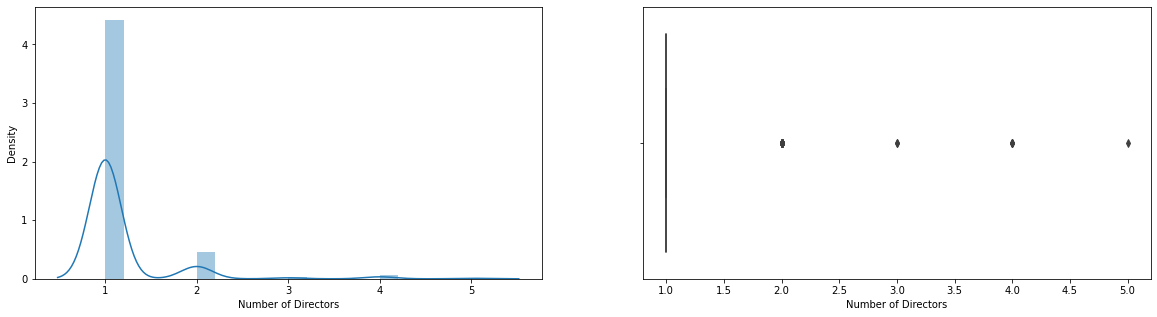

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_tvshows_count_directors['Number of Directors'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_tvshows_count_directors['Number of Directors'], ax = ax[1])
plt.show()

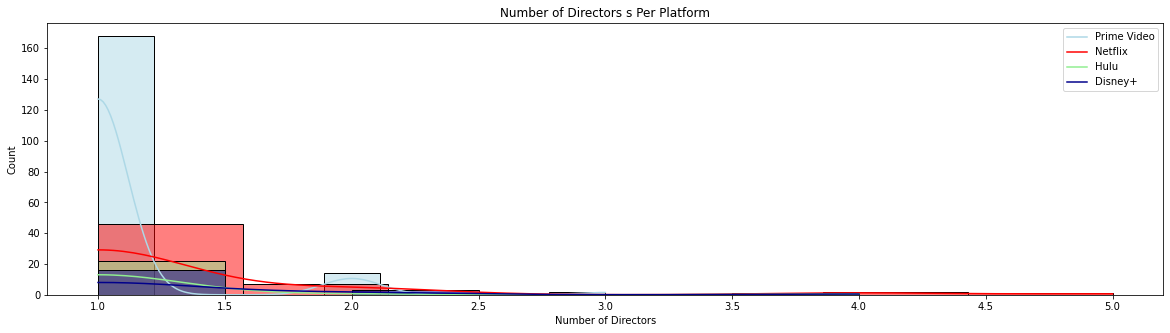

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Directors s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_directors_tvshows['Number of Directors'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_directors_tvshows['Number of Directors'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_directors_tvshows['Number of Directors'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_directors_tvshows['Number of Directors'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_tvshows_director['Directors'].str.split(',').apply(pd.Series).stack()
del df_tvshows_director['Directors']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Director'
df_tvshows_director = df_tvshows_director.join(df_lan)
df_tvshows_director.drop_duplicates(inplace = True)

In [49]:
df_tvshows_director.head(5)

ID              Title  Year Age IMDb Rotten Tomatoes  \
6    7       A Wednesday!  2008  NR  8.1              NA   
9   10            Rainbow  2015  NR    7               0   
11  12          Wakefield  2017  18  8.1              72   
12  13  Alive and Kicking  2017  NR  6.2              83   
17  18               Zero  2018  NR  5.5              88   

                                                 Cast  \
6                                                  NA   
9   Geoffrey Hayes,Roy Skelton,Stanley Bates,Rod B...   
11  Rudi Dharmalingam,Mandy McElhinney,Geraldine H...   
12  Álvaro Requena,Marco Sanz,Sara Manzano,Aitor V...   
17  Giuseppe Dave Seke,Haroun Fall,Beatrice Grannò...   

                                Genres         Country Language  ... Runtime  \
6         Comedy,Family,Fantasy,Horror   United States  English  ...     104   
9                     Animation,Family  United Kingdom  English  ...      22   
11                             Mystery       Australia  English  ...     106   
12              Adventure,Drama,Family           Spain  Spanish  ...      94   
17  Action,Comedy,Drama,Fantasy,Sci-Fi           Italy  Italian  ...     164   

         Kind Seasons Netflix  Hulu  Prime Video  Disney+  Type  \
6   tv series       1       1     0            0        0     1   
9   tv series      20       1     0            0        0     1   
11  tv series       1       1     0            0        0     1   
12  tv series       1       1     0            0        0     1   
17  tv series       1       1     0            1        0     1   

    Service Provider         Director  
6            Netflix    Neeraj Pandey  
9            Netflix  Nagesh Kukunoor  
11           Netflix    Robin Swicord  
12           Netflix    Cyril Frankel  
17           Netflix    Aanand L. Rai  

[5 rows x 21 columns]

In [50]:
director_count = df_tvshows_director.groupby('Director')['Title'].count()
director_tvshows = df_tvshows_director.groupby('Director')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
director_data_tvshows = pd.concat([director_count, director_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count'})
director_data_tvshows = director_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [51]:
# Director with TV Shows Counts - All Platforms Combined
director_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
37          Bob Smeaton               3        0     0            3        0
47      Callie T. Wiser               2        0     0            2        0
169       Lewis Lovhaug               2        0     0            1        1
58   Christopher Menaul               2        1     0            1        0
88        Fabien Beziat               2        2     0            0        0
232        Rick Morales               2        1     0            1        0
224    Randall MacLowry               2        0     0            2        0
132        Jeremy Marre               2        0     0            2        0
113        Hugues Nancy               2        2     0            0        0
181  Matthew Longfellow               2        0     0            2        0

In [52]:
fig = px.bar(x = director_data_tvshows['Director'][:50],
             y = director_data_tvshows['TV Shows Count'][:50], 
             color = director_data_tvshows['TV Shows Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Director', 'y' : 'TV Shows Count'},
             title  = 'Major Directors : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [53]:
df_director_high_tvshows = director_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_director_high_tvshows = df_director_high_tvshows.drop(['index'], axis = 1)
# filter = (director_data_tvshows['TV Shows Count'] == (director_data_tvshows['TV Shows Count'].max()))
# df_director_high_tvshows = director_data_tvshows[filter]
 
# highest_rated_tvshows = director_data_tvshows.loc[director_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nDirector with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_director_high_tvshows.head(5)


Director with Highest Ever TV Shows Count are : All Platforms Combined



Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0         Bob Smeaton               3        0     0            3        0
1     Callie T. Wiser               2        0     0            2        0
2       Lewis Lovhaug               2        0     0            1        1
3  Christopher Menaul               2        1     0            1        0
4       Fabien Beziat               2        2     0            0        0

In [54]:
fig = px.bar(y = df_director_high_tvshows['Director'][:15],
             x = df_director_high_tvshows['TV Shows Count'][:15], 
             color = df_director_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Highest TV Shows : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [55]:
df_director_low_tvshows = director_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_director_low_tvshows = df_director_low_tvshows.drop(['index'], axis = 1)
# filter = (director_data_tvshows['TV Shows Count'] == (director_data_tvshows['TV Shows Count'].min()))
# df_director_low_tvshows = director_data_tvshows[filter]

print('\nDirector with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_director_low_tvshows.head(5)


Director with Lowest Ever TV Shows Count are : All Platforms Combined



Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0          Sol Choi               1        0     0            0        1
1   Adolfo Alix Jr.               1        0     0            1        0
2     Alan Caldwell               1        1     0            0        0
3       Alan Lewens               1        0     0            1        0
4  Alastair Layzell               1        0     0            1        0

In [56]:
fig = px.bar(y = df_director_low_tvshows['Director'][:15],
             x = df_director_low_tvshows['TV Shows Count'][:15], 
             color = df_director_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Lowest TV Shows Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [57]:
print(f'''
      Total '{director_data_tvshows['Director'].unique().shape[0]}' unique Director Count s were Given, They were Like this,\n
      
      {director_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Director'].unique()[:5]}\n
 
      The Highest Ever TV Shows Count Ever Any TV Show Got is '{df_director_high_tvshows['Director'][0]}' : '{df_director_high_tvshows['TV Shows Count'].max()}'\n
 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is '{df_director_low_tvshows['Director'][0]}' : '{df_director_low_tvshows['TV Shows Count'].min()}'\n
      ''')


      Total '307' unique Director Count s were Given, They were Like this,

      
      ['Bob Smeaton' 'Callie T. Wiser' 'Lewis Lovhaug' 'Christopher Menaul'
 'Fabien Beziat']

 
      The Highest Ever TV Shows Count Ever Any TV Show Got is 'Bob Smeaton' : '3'

 
      The Lowest Ever TV Shows Count Ever Any TV Show Got is 'Sol Choi' : '1'

      


In [58]:
fig = px.pie(director_data_tvshows[:10], names = 'Director', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Director')
fig.show()

In [59]:
# netflix_director_tvshows = director_data_tvshows[director_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_director_tvshows = netflix_director_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_director_high_tvshows = df_director_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_director_high_tvshows = netflix_director_high_tvshows.drop(['index'], axis = 1)
 
netflix_director_low_tvshows = df_director_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_director_low_tvshows = netflix_director_low_tvshows.drop(['index'], axis = 1)
 
netflix_director_high_tvshows.head(5)

Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Fabien Beziat               2        2     0            0        0
1     Hugues Nancy               2        2     0            0        0
2  Julien Leclercq               1        1     0            0        0
3  Federico Veiroj               1        1     0            0        0
4  Nagesh Kukunoor               1        1     0            0        0

In [60]:
fig = px.bar(x = netflix_director_high_tvshows['Director'][:15],
             y = netflix_director_high_tvshows['Netflix'][:15], 
             color = netflix_director_high_tvshows['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Highest TV Shows : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [61]:
# hulu_director_tvshows = director_data_tvshows[director_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_director_tvshows = hulu_director_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_director_high_tvshows = df_director_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_director_high_tvshows = hulu_director_high_tvshows.drop(['index'], axis = 1)
 
hulu_director_low_tvshows = df_director_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_director_low_tvshows = hulu_director_low_tvshows.drop(['index'], axis = 1)
 
hulu_director_high_tvshows.head(5)

Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0  Zenith DeGregorio               1        0     1            0        0
1   Brian K. Roberts               1        0     1            0        0
2      Grey Lockwood               1        0     1            0        0
3   Charles S. Dubin               1        0     1            0        0
4       Shane Dawson               1        0     1            1        0

In [62]:
fig = px.bar(x = hulu_director_high_tvshows['Director'][:15],
             y = hulu_director_high_tvshows['Hulu'][:15], 
             color = hulu_director_high_tvshows['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Highest TV Shows : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [63]:
# prime_video_director_tvshows = director_data_tvshows[director_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_director_tvshows = prime_video_director_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_director_high_tvshows = df_director_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_director_high_tvshows = prime_video_director_high_tvshows.drop(['index'], axis = 1)
 
prime_video_director_low_tvshows = df_director_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_director_low_tvshows = prime_video_director_low_tvshows.drop(['index'], axis = 1)
 
prime_video_director_high_tvshows.head(5)

Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0         Bob Smeaton               3        0     0            3        0
1    Randall MacLowry               2        0     0            2        0
2        Jeremy Marre               2        0     0            2        0
3  Matthew Longfellow               2        0     0            2        0
4     Callie T. Wiser               2        0     0            2        0

In [64]:
fig = px.bar(x = prime_video_director_high_tvshows['Director'][:15],
             y = prime_video_director_high_tvshows['Prime Video'][:15], 
             color = prime_video_director_high_tvshows['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Highest TV Shows : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [65]:
# disney_director_tvshows = director_data_tvshows[director_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_director_tvshows = disney_director_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_director_high_tvshows = df_director_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_director_high_tvshows = disney_director_high_tvshows.drop(['index'], axis = 1)
 
disney_director_low_tvshows = df_director_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_director_low_tvshows = disney_director_low_tvshows.drop(['index'], axis = 1)
 
disney_director_high_tvshows.head(5)

Director  TV Shows Count  Netflix  Hulu  Prime Video  Disney+
0    Robert Stevenson               1        0     0            0        1
1     Wilfred Jackson               1        0     0            0        1
2       Steve Martino               1        0     0            0        1
3  Sotiris Tsafoulias               1        0     0            0        1
4        Sue Perrotto               1        0     0            0        1

In [66]:
fig = px.bar(x = disney_director_high_tvshows['Director'][:15],
             y = disney_director_high_tvshows['Disney+'][:15], 
             color = disney_director_high_tvshows['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Director', 'x' : 'TV Shows Count'},
             title  = 'Director with Highest TV Shows : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

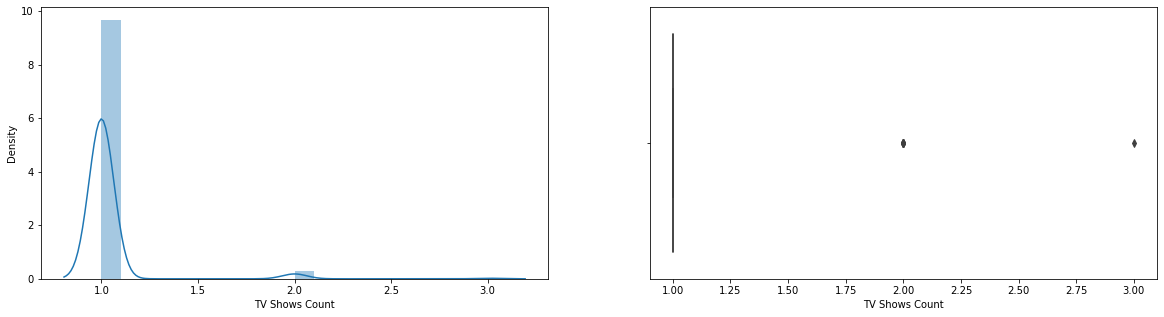

In [67]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(director_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(director_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [68]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_director_tvshows = director_data_tvshows[director_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_director_tvshows = netflix_director_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_director_tvshows = director_data_tvshows[director_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_director_tvshows = hulu_director_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_director_tvshows = director_data_tvshows[director_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_director_tvshows = prime_video_director_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_director_tvshows = director_data_tvshows[director_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_director_tvshows = disney_director_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

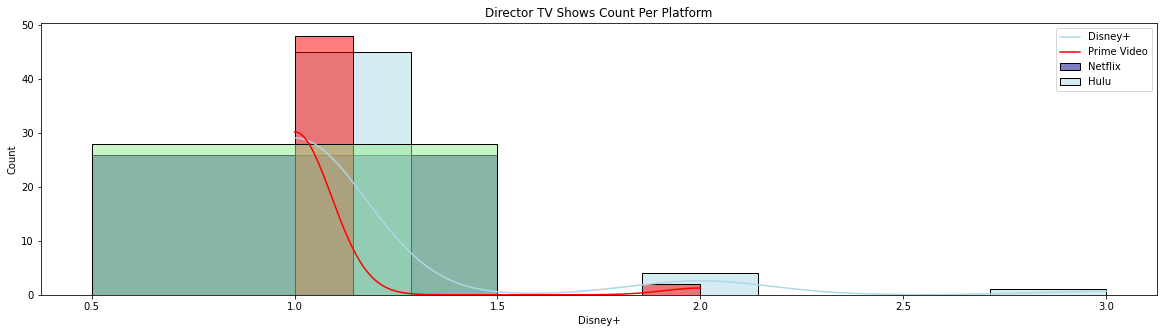

In [69]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Director TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_director_tvshows['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_director_tvshows['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_director_tvshows['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_director_tvshows['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [70]:
print(f'''
      The Director with Highest TV Shows Count Ever Got is '{df_director_high_tvshows['Director'][0]}' : '{df_director_high_tvshows['TV Shows Count'].max()}'\n
      The Director with Lowest TV Shows Count Ever Got is '{df_director_low_tvshows['Director'][0]}' : '{df_director_low_tvshows['TV Shows Count'].min()}'\n
      
      The Director with Highest TV Shows Count on 'Netflix' is '{netflix_director_high_tvshows['Director'][0]}' : '{netflix_director_high_tvshows['Netflix'].max()}'\n
      The Director with Lowest TV Shows Count on 'Netflix' is '{netflix_director_low_tvshows['Director'][0]}' : '{netflix_director_low_tvshows['Netflix'].min()}'\n
      
      The Director with Highest TV Shows Count on 'Hulu' is '{hulu_director_high_tvshows['Director'][0]}' : '{hulu_director_high_tvshows['Hulu'].max()}'\n
      The Director with Lowest TV Shows Count on 'Hulu' is '{hulu_director_low_tvshows['Director'][0]}' : '{hulu_director_low_tvshows['Hulu'].min()}'\n
      
      The Director with Highest TV Shows Count on 'Prime Video' is '{prime_video_director_high_tvshows['Director'][0]}' : '{prime_video_director_high_tvshows['Prime Video'].max()}'\n
      The Director with Lowest TV Shows Count on 'Prime Video' is '{prime_video_director_low_tvshows['Director'][0]}' : '{prime_video_director_low_tvshows['Prime Video'].min()}'\n
      
      The Director with Highest TV Shows Count on 'Disney+' is '{disney_director_high_tvshows['Director'][0]}' : '{disney_director_high_tvshows['Disney+'].max()}'\n
      The Director with Lowest TV Shows Count on 'Disney+' is '{disney_director_low_tvshows['Director'][0]}' : '{disney_director_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Director with Highest TV Shows Count Ever Got is 'Bob Smeaton' : '3'

      The Director with Lowest TV Shows Count Ever Got is 'Sol Choi' : '1'

      
      The Director with Highest TV Shows Count on 'Netflix' is 'Fabien Beziat' : '2'

      The Director with Lowest TV Shows Count on 'Netflix' is 'Bob Smeaton' : '0'

      
      The Director with Highest TV Shows Count on 'Hulu' is 'Zenith DeGregorio' : '1'

      The Director with Lowest TV Shows Count on 'Hulu' is 'Bob Smeaton' : '0'

      
      The Director with Highest TV Shows Count on 'Prime Video' is 'Bob Smeaton' : '3'

      The Director with Lowest TV Shows Count on 'Prime Video' is 'Julien Leclercq' : '0'

      
      The Director with Highest TV Shows Count on 'Disney+' is 'Robert Stevenson' : '1'

      The Director with Lowest TV Shows Count on 'Disney+' is 'Bob Smeaton' : '0'
 
      


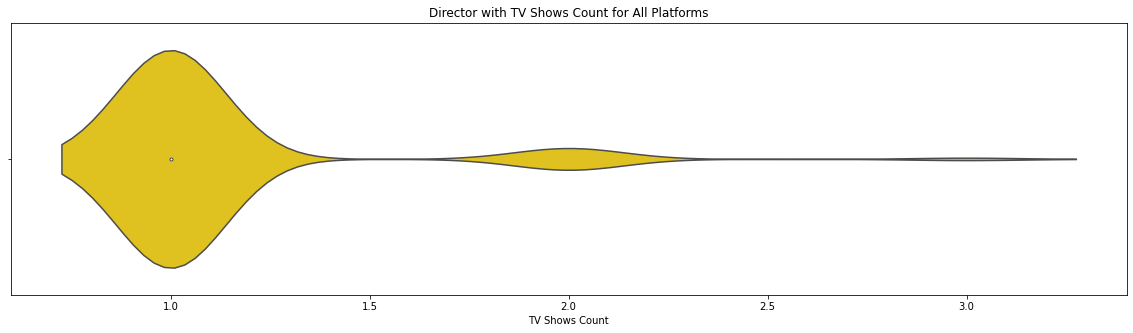

In [71]:
# Distribution of tvshows director in each platform
plt.figure(figsize = (20, 5))
plt.title('Director with TV Shows Count for All Platforms')
sns.violinplot(x = director_data_tvshows['TV Shows Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

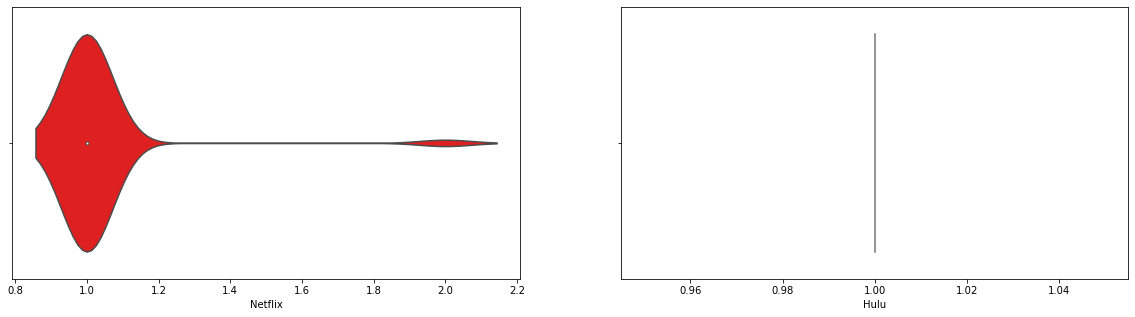

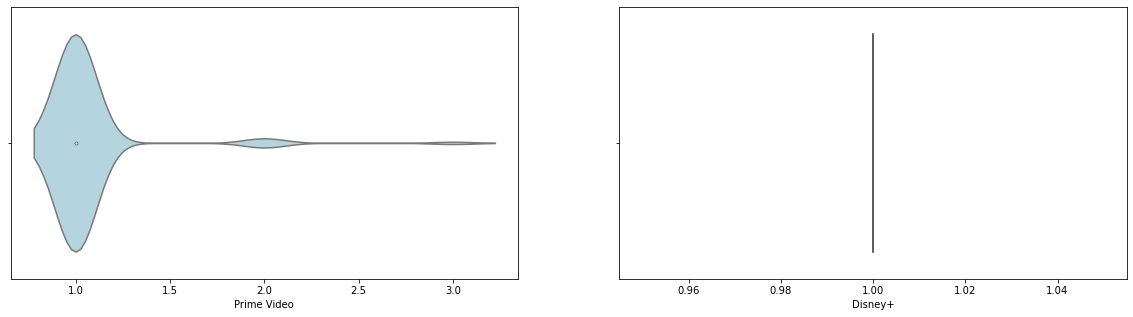

In [72]:
# Distribution of Director TV Shows Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_director_tvshows['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_director_tvshows['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_director_tvshows['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_director_tvshows['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [73]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Director is '{round(director_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Director on 'Netflix' is '{round(netflix_director_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Director on 'Hulu' is '{round(hulu_director_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Director on 'Prime Video' is '{round(prime_video_director_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Director on 'Disney+' is '{round(disney_director_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Director is '1.04'

      The Average TV Shows Count of Director on 'Netflix' is '1.03'

      The Average TV Shows Count of Director on 'Hulu' is '1.0'

      The Average TV Shows Count of Director on 'Prime Video' is '1.03'

      The Average TV Shows Count of Director on 'Disney+' is '1.0'
 
      


In [74]:
print(f'''
      Accross All Platforms Total Count of Director is '{director_data_tvshows['Director'].unique().shape[0]}'\n
      Total Count of Director on 'Netflix' is '{netflix_director_tvshows['Director'].unique().shape[0]}'\n
      Total Count of Director on 'Hulu' is '{hulu_director_tvshows['Director'].unique().shape[0]}'\n
      Total Count of Director on 'Prime Video' is '{prime_video_director_tvshows['Director'].unique().shape[0]}'\n
      Total Count of Director on 'Disney+' is '{disney_director_tvshows['Director'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Director is '307'

      Total Count of Director on 'Netflix' is '70'

      Total Count of Director on 'Hulu' is '28'

      Total Count of Director on 'Prime Video' is '196'

      Total Count of Director on 'Disney+' is '26'
 
      


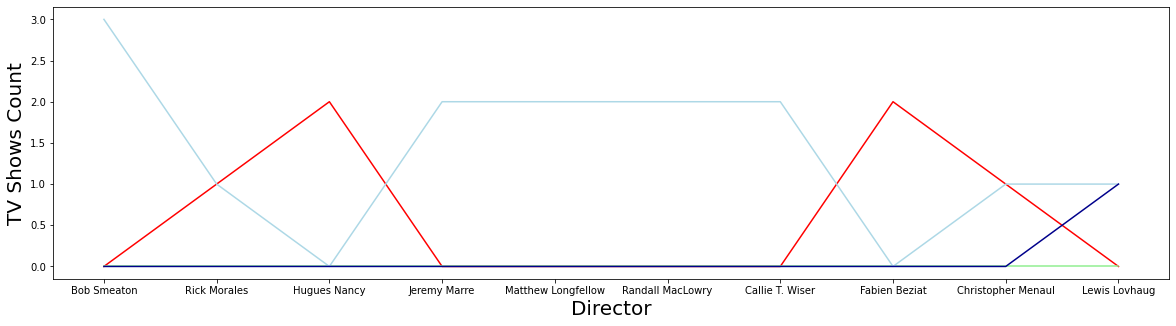

In [75]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = director_data_tvshows['Director'][:10], y = director_data_tvshows['Netflix'][:10], color = 'red')
sns.lineplot(x = director_data_tvshows['Director'][:10], y = director_data_tvshows['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = director_data_tvshows['Director'][:10], y = director_data_tvshows['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = director_data_tvshows['Director'][:10], y = director_data_tvshows['Disney+'][:10], color = 'darkblue')
plt.xlabel('Director', fontsize = 20)
plt.ylabel('TV Shows Count', fontsize = 20)
plt.show()

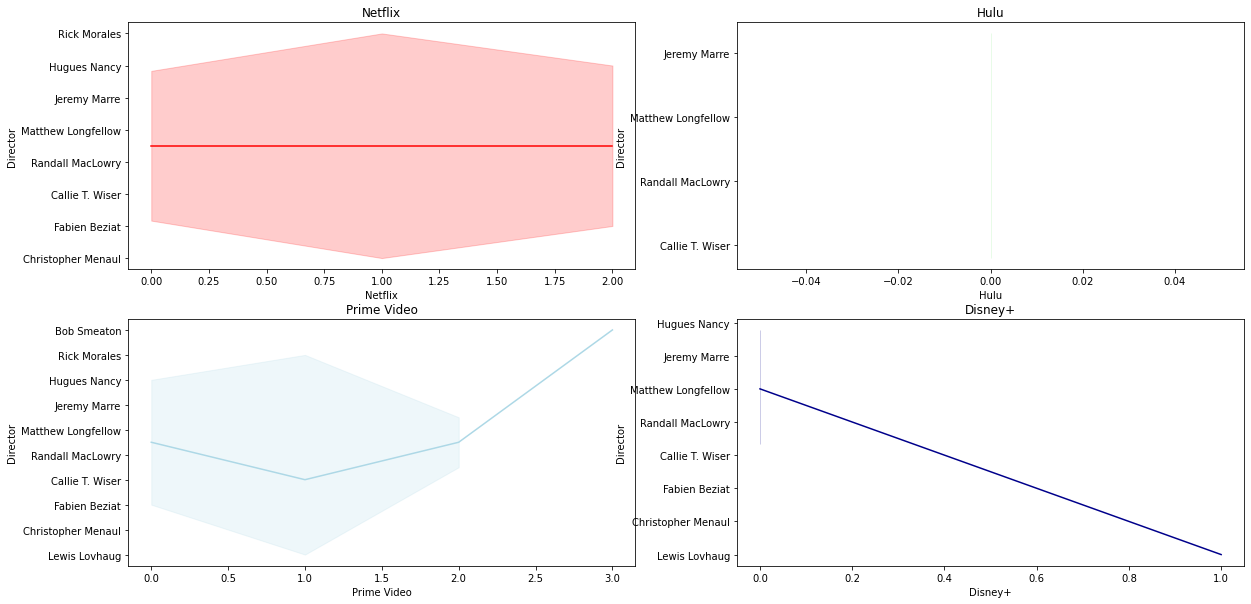

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_d_ax1 = sns.lineplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_d_ax2 = sns.lineplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_d_ax3 = sns.lineplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_d_ax4 = sns.lineplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

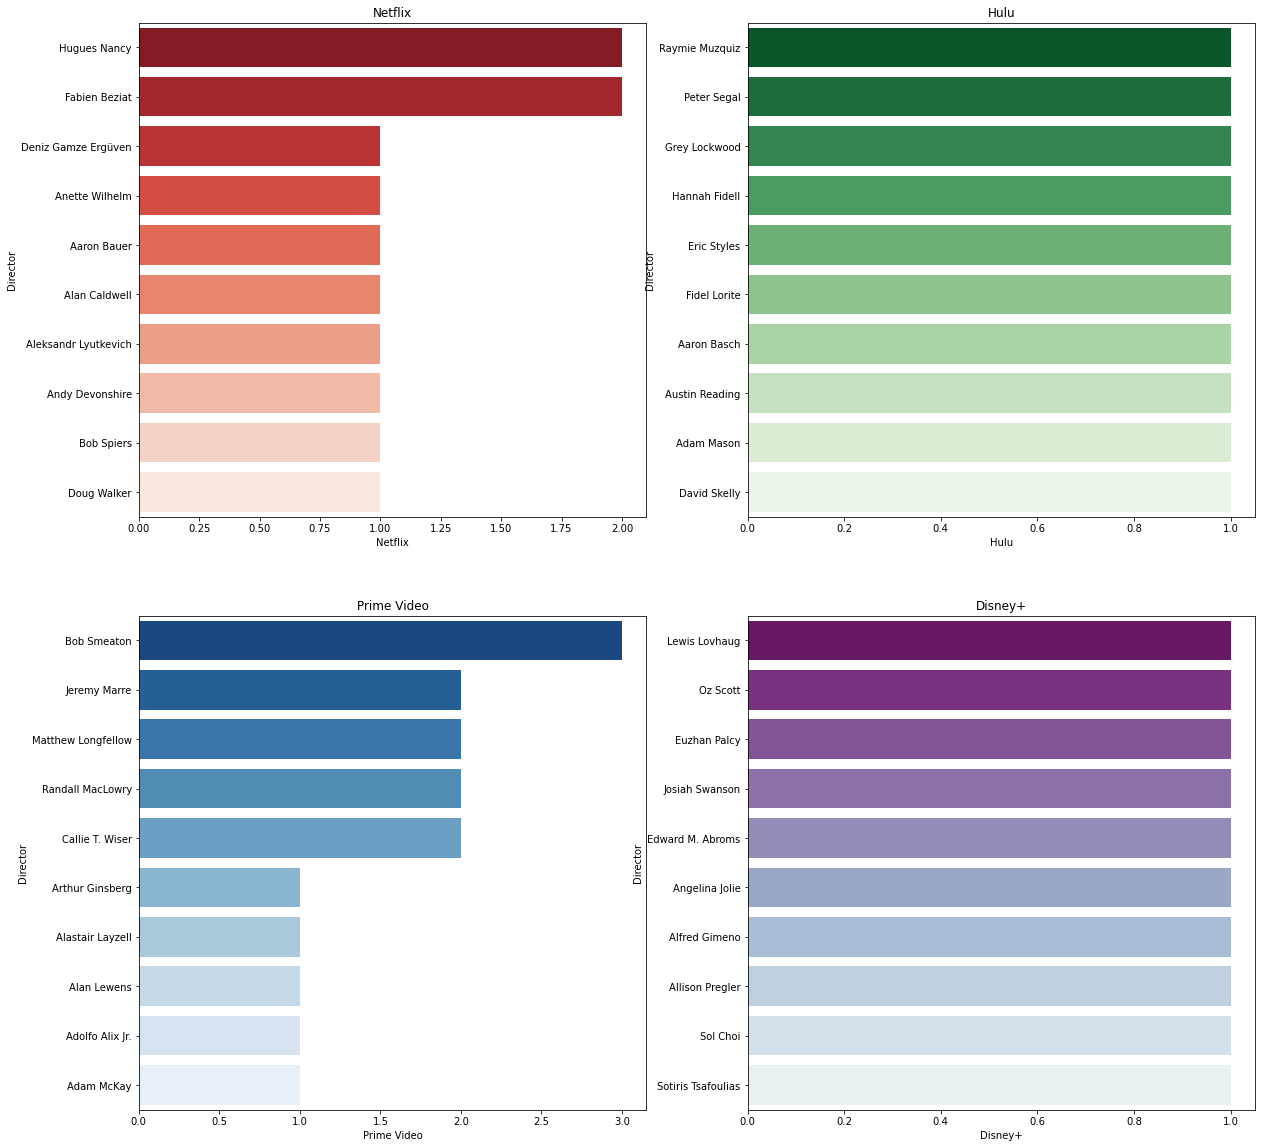

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_d_ax1 = sns.barplot(y = netflix_director_tvshows['Director'][:10], x = netflix_director_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_d_ax2 = sns.barplot(y = hulu_director_tvshows['Director'][:10], x = hulu_director_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_d_ax3 = sns.barplot(y = prime_video_director_tvshows['Director'][:10], x = prime_video_director_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_d_ax4 = sns.barplot(y = disney_director_tvshows['Director'][:10], x = disney_director_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

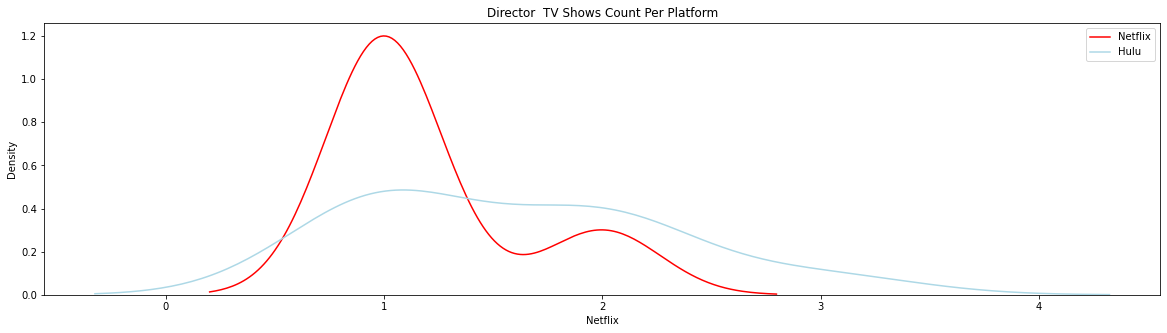

In [78]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Director  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_director_tvshows['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_director_tvshows['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_director_tvshows['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_director_tvshows['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

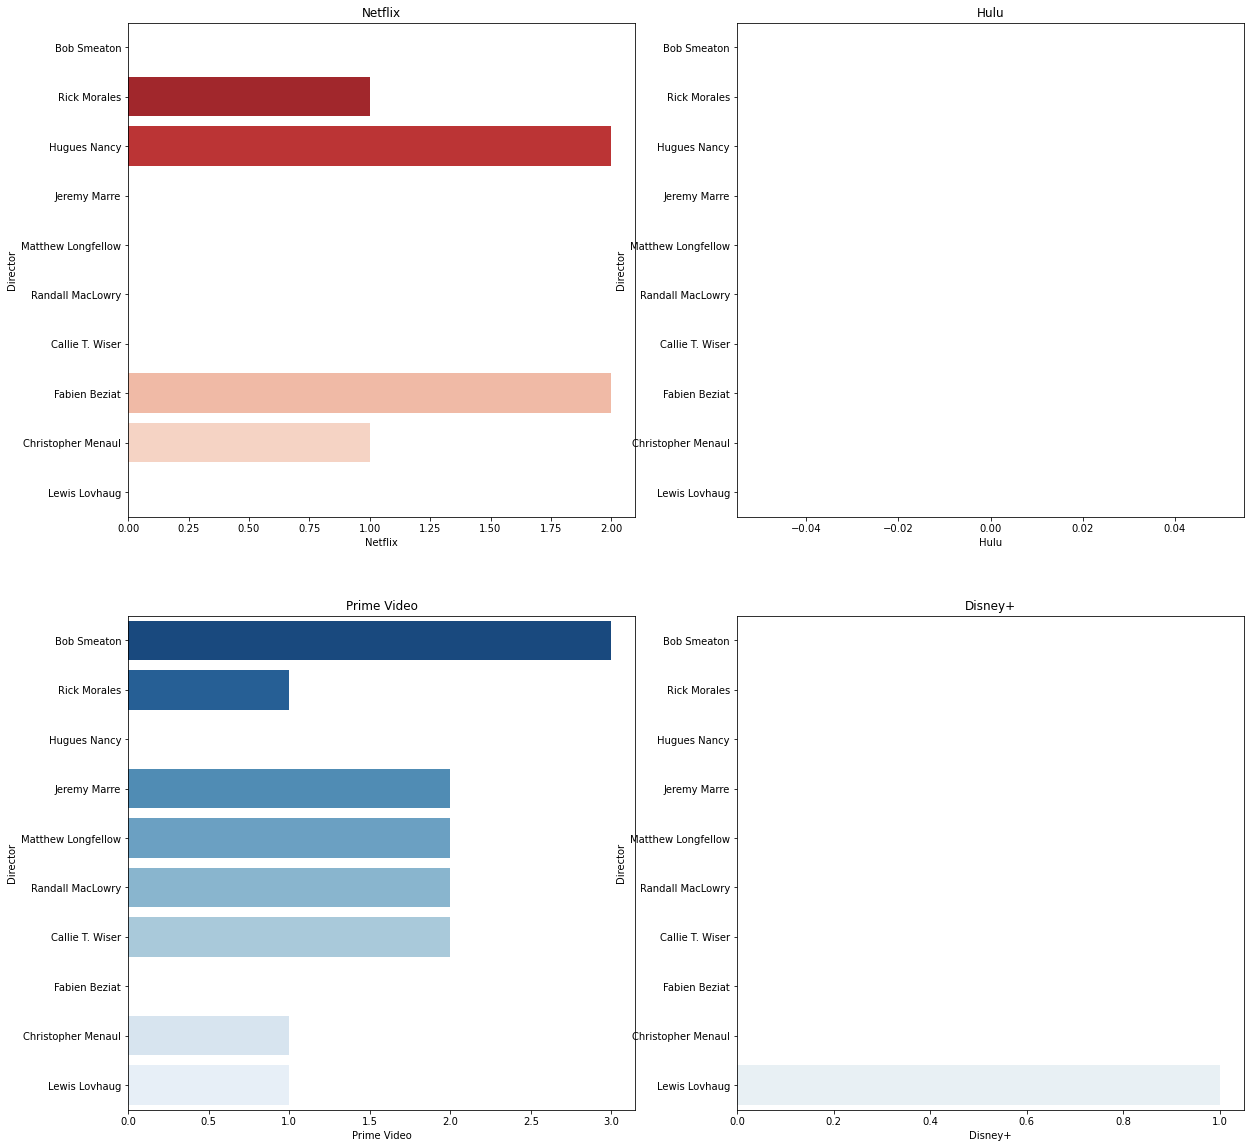

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_d_ax1 = sns.barplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_d_ax2 = sns.barplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_d_ax3 = sns.barplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_d_ax4 = sns.barplot(y = director_data_tvshows['Director'][:10], x = director_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

In [80]:
df_tvshows_mixed_directors.drop(df_tvshows_mixed_directors.loc[df_tvshows_mixed_directors['Directors'] == "NA"].index, inplace = True)
# df_tvshows_mixed_directors = df_tvshows_mixed_directors[df_tvshows_mixed_directors.Director != "NA"]
df_tvshows_mixed_directors.drop(df_tvshows_mixed_directors.loc[df_tvshows_mixed_directors['Number of Directors'] == 1].index, inplace = True)

In [81]:
df_tvshows_mixed_directors.head(5)

ID                                  Title  Year Age IMDb Rotten Tomatoes  \
25  26                                  K. D.  2019  NR  8.6              87   
43  44                           Beak & Brain  2013  NR  7.9              NA   
53  54        Stretch Armstrong: The Breakout  2018  NR  6.6              NA   
64  65                        All About Asado  2016  NR  6.6              NA   
77  78  Elles étaient en guerre (1914 - 1918)  2014  NR  7.9              NA   

                                            Directors  \
25  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...   
43                          Volker Arzt,Angelika Sigl   
53  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...   
64                          Tony Bueno,Emily Pattison   
77                         Fabien Beziat,Hugues Nancy   

                                                 Cast  \
25  Maya Alagh,Nayan Bhatt,Manav Gohil,Darshan Jar...   
43  Hans-Peter Bögel,Alice Auersperg,Gyula Gajdon,...   
53  Ogie Banks,Clancy Brown,Yvette Nicole Brown,Ga...   
64                                      Abby Harrison   
77  Nathalie Baye,Edith Wharton,Louise Bodin,Emmel...   

                                            Genres        Country  ...  \
25                    Crime,Drama,Mystery,Thriller             NA  ...   
43                                     Documentary        Germany  ...   
53  Animation,Short,Action,Adventure,Comedy,Sci-Fi             NA  ...   
64                                       Talk-Show  United States  ...   
77                             Documentary,History         France  ...   

   Runtime       Kind Seasons Netflix Hulu  Prime Video  Disney+  Type  \
25      45  tv series      NA       1    0            0        0     1   
43      NA  tv series      NA       1    0            0        0     1   
53      NA  tv series      NA       1    0            0        0     1   
64      89  tv series      NA       1    0            0        0     1   
77      95  tv series      NA       1    0            0        0     1   

    Service Provider  Number of Directors  
25           Netflix                    4  
43           Netflix                    2  
53           Netflix                    5  
64           Netflix                    2  
77           Netflix                    2  

[5 rows x 22 columns]

In [82]:
mixed_directors_count = df_tvshows_mixed_directors.groupby('Directors')['Title'].count()
mixed_directors_tvshows = df_tvshows_mixed_directors.groupby('Directors')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_directors_data_tvshows = pd.concat([mixed_directors_count, mixed_directors_tvshows], axis = 1).reset_index().rename(columns = {'Title' : 'TV Shows Count', 'Directors' : 'Mixed Director'})
mixed_directors_data_tvshows = mixed_directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)

In [83]:
mixed_directors_data_tvshows.head(5)

Mixed Director  TV Shows Count  \
5                          Fabien Beziat,Hugues Nancy               2   
0   Aaron Basch,Trevor Morris,Chris Olivas,Peter S...               1   
16  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...               1   
29                          Volker Arzt,Angelika Sigl               1   
28  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...               1   

    Netflix  Hulu  Prime Video  Disney+  
5         2     0            0        0  
0         0     1            0        0  
16        0     0            0        1  
29        1     0            0        0  
28        1     0            0        0

In [84]:
# Mixed Director with TV Shows Counts - All Platforms Combined
mixed_directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)[:10]

Mixed Director  TV Shows Count  \
5                          Fabien Beziat,Hugues Nancy               2   
15                Nikolay Kozlov,Aleksandr Lyutkevich               1   
2                       Bruno Mattei,Claudio Fragasso               1   
3                  Daniel Zuckerbrot,Donna Zuckerbrot               1   
4                             David Belton,Andy Byatt               1   
6                      Francesco Manfio,Sergio Manfio               1   
7   Gary Howsam,Mike Smith,John Paul Tremblay,Robb...               1   
8                     Jamie Badminton,Rufus Blacklock               1   
9                       Josh Wakely,Pablo De La Torre               1   
10       José Luis Gutiérrez Rojas,Leopoldo Gutiérrez               1   

    Netflix  Hulu  Prime Video  Disney+  
5         2     0            0        0  
15        1     0            0        0  
2         0     0            1        0  
3         0     0            1        0  
4         0     0            1        0  
6         0     0            1        0  
7         1     0            0        0  
8         0     0            1        0  
9         1     0            0        0  
10        0     0            1        0

In [85]:
df_mixed_directors_high_tvshows = mixed_directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False).reset_index()
df_mixed_directors_high_tvshows = df_mixed_directors_high_tvshows.drop(['index'], axis = 1)
# filter = (mixed_directors_data_tvshows['TV Shows Count'] = =  (mixed_directors_data_tvshows['TV Shows Count'].max()))
# df_mixed_directors_high_tvshows = mixed_directors_data_tvshows[filter]
 
# highest_rated_tvshows = mixed_directors_data_tvshows.loc[mixed_directors_data_tvshows['TV Shows Count'].idxmax()]
 
print('\nMixed Director with Highest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_directors_high_tvshows.head(5)


Mixed Director with Highest Ever TV Shows Count are : All Platforms Combined



Mixed Director  TV Shows Count  Netflix  Hulu  \
0           Fabien Beziat,Hugues Nancy               2        2     0   
1  Nikolay Kozlov,Aleksandr Lyutkevich               1        1     0   
2        Bruno Mattei,Claudio Fragasso               1        0     0   
3   Daniel Zuckerbrot,Donna Zuckerbrot               1        0     0   
4              David Belton,Andy Byatt               1        0     0   

   Prime Video  Disney+  
0            0        0  
1            0        0  
2            1        0  
3            1        0  
4            1        0

In [86]:
fig = px.bar(y = df_mixed_directors_high_tvshows['Mixed Director'][:15],
             x = df_mixed_directors_high_tvshows['TV Shows Count'][:15], 
             color = df_mixed_directors_high_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Director'},
             title  = 'TV Shows with Highest Number of Mixed Directors : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [87]:
df_mixed_directors_low_tvshows = mixed_directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = True).reset_index()
df_mixed_directors_low_tvshows = df_mixed_directors_low_tvshows.drop(['index'], axis = 1)
# filter = (mixed_directors_data_tvshows['TV Shows Count'] = =  (mixed_directors_data_tvshows['TV Shows Count'].min()))
# df_mixed_directors_low_tvshows = mixed_directors_data_tvshows[filter]
 
print('\nMixed Director with Lowest Ever TV Shows Count are : All Platforms Combined\n')
df_mixed_directors_low_tvshows.head(5)


Mixed Director with Lowest Ever TV Shows Count are : All Platforms Combined



Mixed Director  TV Shows Count  Netflix  \
0  Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,...               1        1   
1                 Daniel Zuckerbrot,Donna Zuckerbrot               1        0   
2                            David Belton,Andy Byatt               1        0   
3                     Francesco Manfio,Sergio Manfio               1        0   
4  Gary Howsam,Mike Smith,John Paul Tremblay,Robb...               1        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            1        0  
2     0            1        0  
3     0            1        0  
4     0            0        0

In [88]:
fig = px.bar(y = df_mixed_directors_low_tvshows['Mixed Director'][:15],
             x = df_mixed_directors_low_tvshows['TV Shows Count'][:15], 
             color = df_mixed_directors_low_tvshows['TV Shows Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'TV Shows', 'x' : 'Number of Mixed Director'},
             title  = 'TV Shows with Lowest Number of Mixed Directors : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [89]:
print(f'''
      Total '{df_tvshows_directors['Directors'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see TV Shows from Total '{mixed_directors_data_tvshows['Mixed Director'].unique().shape[0]}' Mixed Director, They were Like this, \n
 
      {mixed_directors_data_tvshows.sort_values(by = 'TV Shows Count', ascending = False)['Mixed Director'].head(5).unique()} etc. \n
 
      The Mixed Director with Highest TV Shows Count have '{mixed_directors_data_tvshows['TV Shows Count'].max()}' TV Shows Available is '{df_mixed_directors_high_tvshows['Mixed Director'][0]}', &\n
      The Mixed Director with Lowest TV Shows Count have '{mixed_directors_data_tvshows['TV Shows Count'].min()}' TV Shows Available is '{df_mixed_directors_low_tvshows['Mixed Director'][0]}'
      ''')


      Total '274' Titles are available on All Platforms, out of which

      You Can Choose to see TV Shows from Total '31' Mixed Director, They were Like this, 

 
      ['Fabien Beziat,Hugues Nancy' 'Nikolay Kozlov,Aleksandr Lyutkevich'
 'Bruno Mattei,Claudio Fragasso' 'Daniel Zuckerbrot,Donna Zuckerbrot'
 'David Belton,Andy Byatt'] etc. 

 
      The Mixed Director with Highest TV Shows Count have '2' TV Shows Available is 'Fabien Beziat,Hugues Nancy', &

      The Mixed Director with Lowest TV Shows Count have '1' TV Shows Available is 'Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,Udayan Pradeep Shukla'
      


In [90]:
fig = px.pie(mixed_directors_data_tvshows[:4], names = 'Mixed Director', values = 'TV Shows Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'TV Shows Count based on Mixed Director')
fig.show()

In [91]:
# netflix_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_directors_tvshows = netflix_mixed_directors_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
netflix_mixed_directors_high_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_directors_high_tvshows = netflix_mixed_directors_high_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_directors_low_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_directors_low_tvshows = netflix_mixed_directors_low_tvshows.drop(['index'], axis = 1)
 
netflix_mixed_directors_high_tvshows.head(5)

Mixed Director  TV Shows Count  Netflix  \
0                         Fabien Beziat,Hugues Nancy               2        2   
1                      Josh Wakely,Pablo De La Torre               1        1   
2                          Volker Arzt,Angelika Sigl               1        1   
3  Victor Cook,Kevin Altieri,Alan Caldwell,Victor...               1        1   
4                          Tony Bueno,Emily Pattison               1        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     0            0        0  
3     0            0        0  
4     0            0        0

In [92]:
# hulu_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_directors_tvshows = hulu_mixed_directors_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)
 
hulu_mixed_directors_high_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_directors_high_tvshows = hulu_mixed_directors_high_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_directors_low_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_directors_low_tvshows = hulu_mixed_directors_low_tvshows.drop(['index'], axis = 1)
 
hulu_mixed_directors_high_tvshows.head(5)

Mixed Director  TV Shows Count  Netflix  \
0  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...               1        0   
1                        Nelson Boles,Raymie Muzquiz               1        0   
2                         Fabien Beziat,Hugues Nancy               2        2   
3  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...               1        0   
4                          Volker Arzt,Angelika Sigl               1        1   

   Hulu  Prime Video  Disney+  
0     1            0        0  
1     1            0        0  
2     0            0        0  
3     0            0        1  
4     0            0        0

In [93]:
# prime_video_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_directors_tvshows = prime_video_mixed_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)
 
prime_video_mixed_directors_high_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_directors_high_tvshows = prime_video_mixed_directors_high_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_directors_low_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_directors_low_tvshows = prime_video_mixed_directors_low_tvshows.drop(['index'], axis = 1)
 
prime_video_mixed_directors_high_tvshows.head(5)

Mixed Director  TV Shows Count  Netflix  \
0            Kanye West,Alexandre Moors,Elon Rutberg               1        0   
1                       Steve Sekely,Freddie Francis               1        0   
2  Takahiro Kawakoshi,Yoji Minaharu,Yoshimitsu Ôh...               1        0   
3                           Rick Morales,Viren Patil               1        0   
4                            Terry Izumi,Karl Toerge               1        0   

   Hulu  Prime Video  Disney+  
0     0            1        0  
1     0            1        0  
2     0            1        0  
3     0            1        0  
4     0            1        0

In [94]:
# disney_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_directors_tvshows = disney_mixed_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)
 
disney_mixed_directors_high_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_directors_high_tvshows = disney_mixed_directors_high_tvshows.drop(['index'], axis = 1)
 
disney_mixed_directors_low_tvshows = df_mixed_directors_high_tvshows.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_directors_low_tvshows = disney_mixed_directors_low_tvshows.drop(['index'], axis = 1)
 
disney_mixed_directors_high_tvshows.head(5)

Mixed Director  TV Shows Count  Netflix  \
0                   William Beaudine,Wilfred Jackson               1        0   
1  Paul Stodolny,Ricardo Curtis,Steve Martino,Mik...               1        0   
2                             Sol Choi,Alfred Gimeno               1        0   
3                         Robert Hughes,Sue Perrotto               1        0   
4  Aaron Basch,Trevor Morris,Chris Olivas,Peter S...               1        0   

   Hulu  Prime Video  Disney+  
0     0            0        1  
1     0            0        1  
2     0            0        1  
3     0            0        1  
4     1            0        0

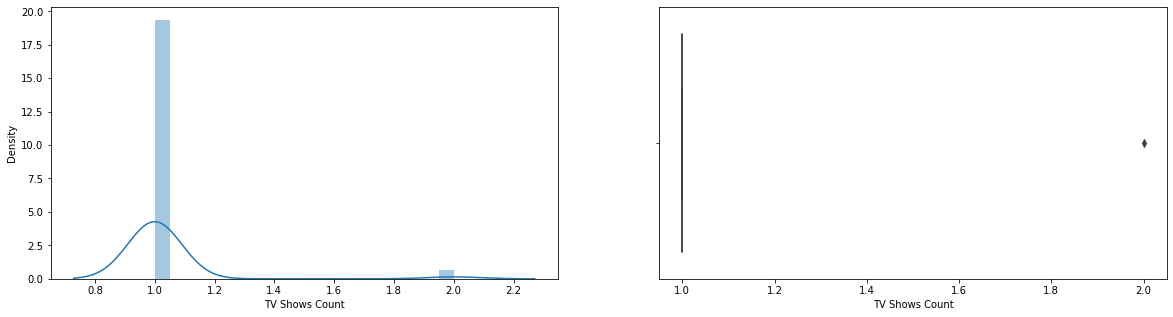

In [95]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_directors_data_tvshows['TV Shows Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_directors_data_tvshows['TV Shows Count'], ax = ax[1])
plt.show()

In [96]:
# Creating distinct dataframes only with the tvshows present on individual streaming platforms
netflix_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_directors_tvshows = netflix_mixed_directors_tvshows.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

hulu_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_directors_tvshows = hulu_mixed_directors_tvshows.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'TV Shows Count'], axis = 1)

prime_video_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_directors_tvshows = prime_video_mixed_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'TV Shows Count'], axis = 1)

disney_mixed_directors_tvshows = mixed_directors_data_tvshows[mixed_directors_data_tvshows['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_directors_tvshows = disney_mixed_directors_tvshows.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'TV Shows Count'], axis = 1)

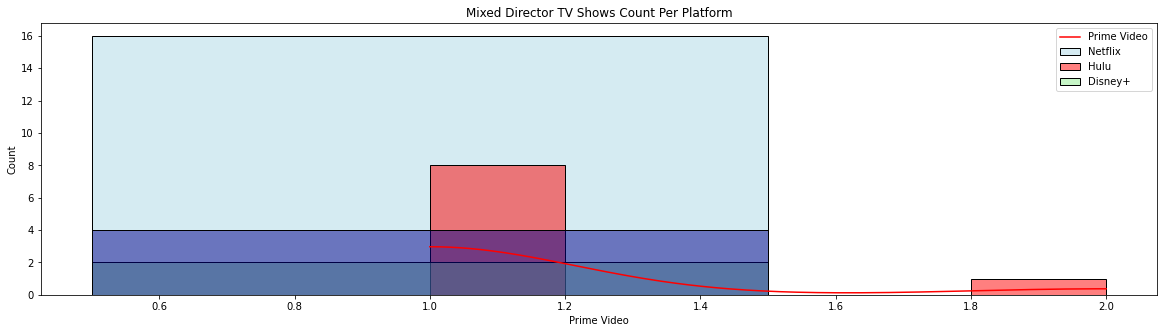

In [97]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Director TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_directors_tvshows['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_directors_tvshows['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_directors_tvshows['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_directors_tvshows['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [98]:
print(f'''
      The Mixed Director with Highest TV Shows Count Ever Got is '{df_mixed_directors_high_tvshows['Mixed Director'][0]}' : '{df_mixed_directors_high_tvshows['TV Shows Count'].max()}'\n
      The Mixed Director with Lowest TV Shows Count Ever Got is '{df_mixed_directors_low_tvshows['Mixed Director'][0]}' : '{df_mixed_directors_low_tvshows['TV Shows Count'].min()}'\n
      
      The Mixed Director with Highest TV Shows Count on 'Netflix' is '{netflix_mixed_directors_high_tvshows['Mixed Director'][0]}' : '{netflix_mixed_directors_high_tvshows['Netflix'].max()}'\n
      The Mixed Director with Lowest TV Shows Count on 'Netflix' is '{netflix_mixed_directors_low_tvshows['Mixed Director'][0]}' : '{netflix_mixed_directors_low_tvshows['Netflix'].min()}'\n
      
      The Mixed Director with Highest TV Shows Count on 'Hulu' is '{hulu_mixed_directors_high_tvshows['Mixed Director'][0]}' : '{hulu_mixed_directors_high_tvshows['Hulu'].max()}'\n
      The Mixed Director with Lowest TV Shows Count on 'Hulu' is '{hulu_mixed_directors_low_tvshows['Mixed Director'][0]}' : '{hulu_mixed_directors_low_tvshows['Hulu'].min()}'\n
      
      The Mixed Director with Highest TV Shows Count on 'Prime Video' is '{prime_video_mixed_directors_high_tvshows['Mixed Director'][0]}' : '{prime_video_mixed_directors_high_tvshows['Prime Video'].max()}'\n
      The Mixed Director with Lowest TV Shows Count on 'Prime Video' is '{prime_video_mixed_directors_low_tvshows['Mixed Director'][0]}' : '{prime_video_mixed_directors_low_tvshows['Prime Video'].min()}'\n
      
      The Mixed Director with Highest TV Shows Count on 'Disney+' is '{disney_mixed_directors_high_tvshows['Mixed Director'][0]}' : '{disney_mixed_directors_high_tvshows['Disney+'].max()}'\n
      The Mixed Director with Lowest TV Shows Count on 'Disney+' is '{disney_mixed_directors_low_tvshows['Mixed Director'][0]}' : '{disney_mixed_directors_low_tvshows['Disney+'].min()}'\n 
      ''')


      The Mixed Director with Highest TV Shows Count Ever Got is 'Fabien Beziat,Hugues Nancy' : '2'

      The Mixed Director with Lowest TV Shows Count Ever Got is 'Rajesh Ranshinge,Prabal Baruah,Suleman Quadri,Udayan Pradeep Shukla' : '1'

      
      The Mixed Director with Highest TV Shows Count on 'Netflix' is 'Fabien Beziat,Hugues Nancy' : '2'

      The Mixed Director with Lowest TV Shows Count on 'Netflix' is 'William Beaudine,Wilfred Jackson' : '0'

      
      The Mixed Director with Highest TV Shows Count on 'Hulu' is 'Aaron Basch,Trevor Morris,Chris Olivas,Peter Schmid-Schoenbein' : '1'

      The Mixed Director with Lowest TV Shows Count on 'Hulu' is 'Fabien Beziat,Hugues Nancy' : '0'

      
      The Mixed Director with Highest TV Shows Count on 'Prime Video' is 'Kanye West,Alexandre Moors,Elon Rutberg' : '1'

      The Mixed Director with Lowest TV Shows Count on 'Prime Video' is 'Fabien Beziat,Hugues Nancy' : '0'

      
      The Mixed Director with Highest TV Show

In [99]:
print(f'''
      Accross All Platforms the Average TV Shows Count of Mixed Director is '{round(mixed_directors_data_tvshows['TV Shows Count'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Director on 'Netflix' is '{round(netflix_mixed_directors_tvshows['Netflix'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Director on 'Hulu' is '{round(hulu_mixed_directors_tvshows['Hulu'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Director on 'Prime Video' is '{round(prime_video_mixed_directors_tvshows['Prime Video'].mean(), ndigits = 2)}'\n
      The Average TV Shows Count of Mixed Director on 'Disney+' is '{round(disney_mixed_directors_tvshows['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average TV Shows Count of Mixed Director is '1.03'

      The Average TV Shows Count of Mixed Director on 'Netflix' is '1.11'

      The Average TV Shows Count of Mixed Director on 'Hulu' is '1.0'

      The Average TV Shows Count of Mixed Director on 'Prime Video' is '1.0'

      The Average TV Shows Count of Mixed Director on 'Disney+' is '1.0'
 
      


In [100]:
print(f'''
      Accross All Platforms Total Count of Mixed Director is '{mixed_directors_data_tvshows['Mixed Director'].unique().shape[0]}'\n
      Total Count of Mixed Director on 'Netflix' is '{netflix_mixed_directors_tvshows['Mixed Director'].unique().shape[0]}'\n
      Total Count of Mixed Director on 'Hulu' is '{hulu_mixed_directors_tvshows['Mixed Director'].unique().shape[0]}'\n
      Total Count of Mixed Director on 'Prime Video' is '{prime_video_mixed_directors_tvshows['Mixed Director'].unique().shape[0]}'\n
      Total Count of Mixed Director on 'Disney+' is '{disney_mixed_directors_tvshows['Mixed Director'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Director is '31'

      Total Count of Mixed Director on 'Netflix' is '9'

      Total Count of Mixed Director on 'Hulu' is '2'

      Total Count of Mixed Director on 'Prime Video' is '16'

      Total Count of Mixed Director on 'Disney+' is '4'
 
      


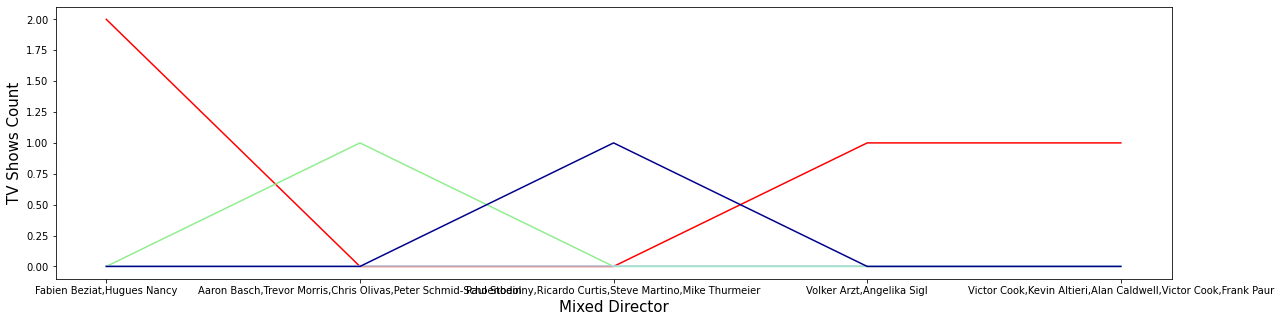

In [101]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:5], y = mixed_directors_data_tvshows['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:5], y = mixed_directors_data_tvshows['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:5], y = mixed_directors_data_tvshows['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:5], y = mixed_directors_data_tvshows['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Director', fontsize = 15)
plt.ylabel('TV Shows Count', fontsize = 15)
plt.show()

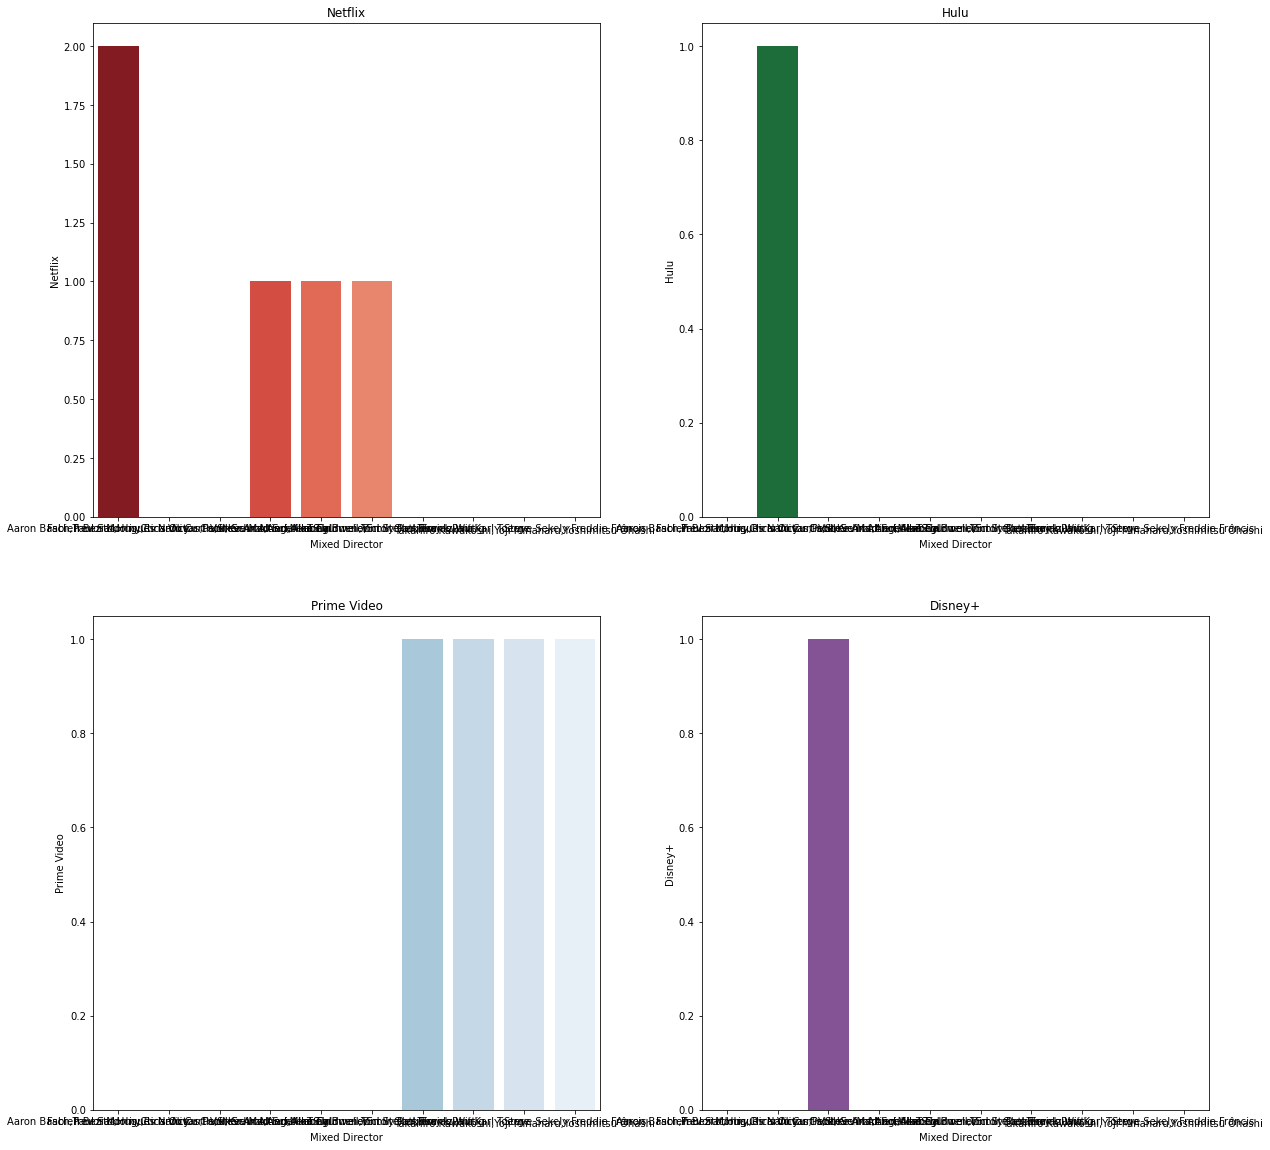

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_d_ax1 = sns.barplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_d_ax2 = sns.barplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_d_ax3 = sns.barplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_d_ax4 = sns.barplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

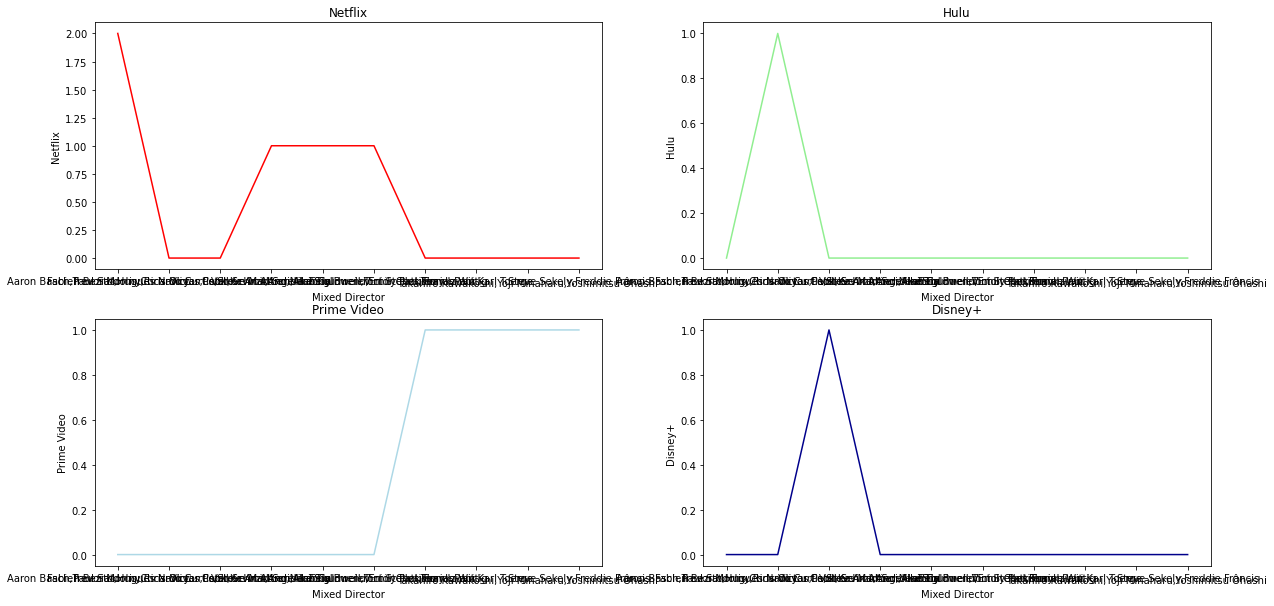

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_md_ax1 = sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_md_ax2 = sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_md_ax3 = sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_md_ax4 = sns.lineplot(x = mixed_directors_data_tvshows['Mixed Director'][:10], y = mixed_directors_data_tvshows['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_md_ax1.title.set_text(labels[0])
h_md_ax2.title.set_text(labels[1])
p_md_ax3.title.set_text(labels[2])
d_md_ax4.title.set_text(labels[3])
 
plt.show()

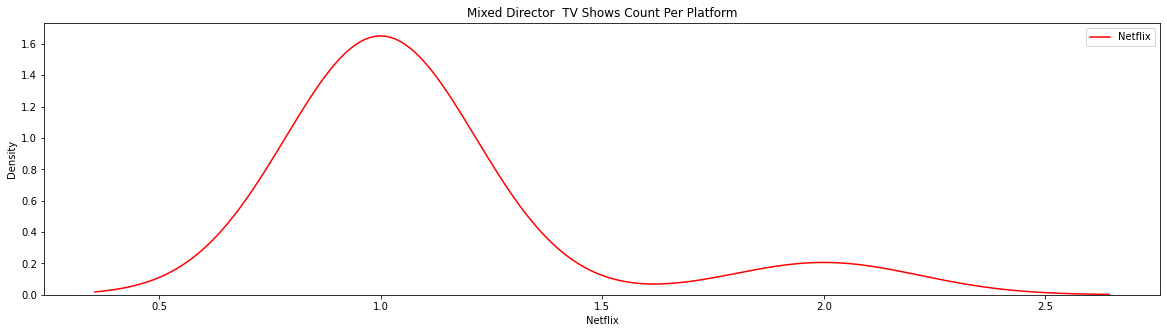

In [104]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Director  TV Shows Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_directors_tvshows['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_directors_tvshows['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_directors_tvshows['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_directors_tvshows['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

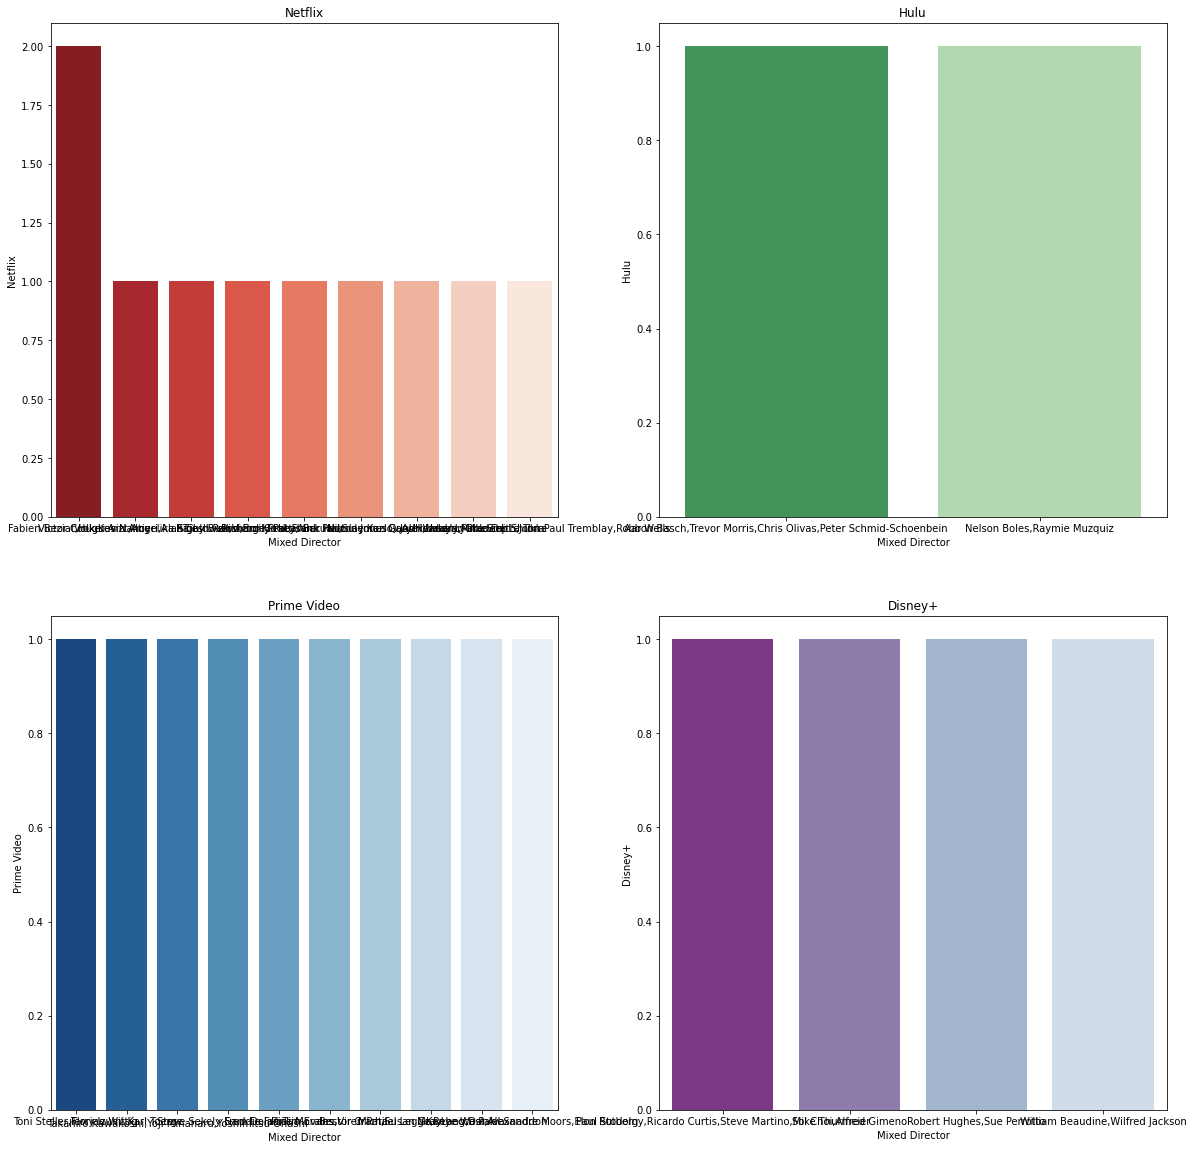

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_md_ax1 = sns.barplot(x = netflix_mixed_directors_tvshows['Mixed Director'][:10], y = netflix_mixed_directors_tvshows['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_md_ax2 = sns.barplot(x = hulu_mixed_directors_tvshows['Mixed Director'][:10], y = hulu_mixed_directors_tvshows['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_md_ax3 = sns.barplot(x = prime_video_mixed_directors_tvshows['Mixed Director'][:10], y = prime_video_mixed_directors_tvshows['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_md_ax4 = sns.barplot(x = disney_mixed_directors_tvshows['Mixed Director'][:10], y = disney_mixed_directors_tvshows['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_md_ax1.title.set_text(labels[0])
h_md_ax2.title.set_text(labels[1])
p_md_ax3.title.set_text(labels[2])
d_md_ax4.title.set_text(labels[3])
 
plt.show()

In [106]:
fig = go.Figure(go.Funnel(y = mixed_directors_data_tvshows['Mixed Director'][:10], x = mixed_directors_data_tvshows['TV Shows Count'][:10]))
fig.show()